

---



---


#  Projeto de Ciência de Dados com Inteligência Artificial


---



---

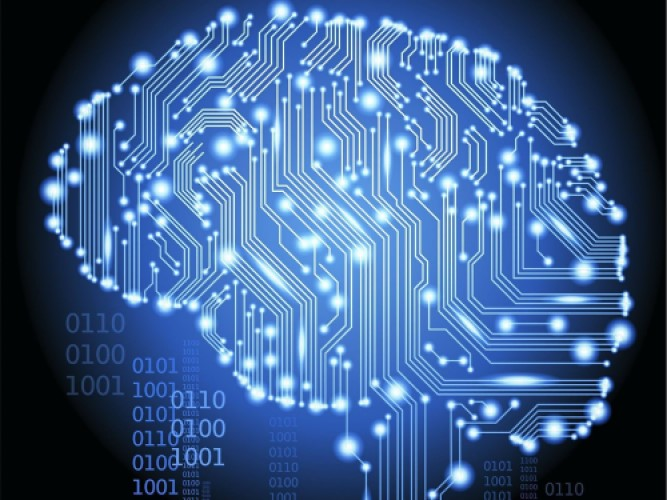

## Dados Farmacológicos

> A base de dados em questão possui dados de pesquisa farmacológica coletados desde aproximadamente 1950, segue a exploração dos dados:










In [4]:
import pandas as pd

url_dados = "https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true"

dados = pd.read_csv(url_dados, compression = "zip")
display(dados)

id    tratamento  tempo dose  ...    c-96    c-97    c-98    c-99
0      id_000644bb2     com_droga     24   D1  ... -0.3981  0.2139  0.3801  0.4176
1      id_000779bfc     com_droga     72   D1  ...  0.1522  0.1241  0.6077  0.7371
2      id_000a6266a     com_droga     48   D1  ... -0.6417 -0.2187 -1.4080  0.6931
3      id_0015fd391     com_droga     48   D1  ... -1.6210 -0.8784 -0.3876 -0.8154
4      id_001626bd3     com_droga     72   D2  ...  0.1094  0.2885 -0.3786  0.7125
...             ...           ...    ...  ...  ...     ...     ...     ...     ...
23809  id_fffb1ceed     com_droga     24   D2  ...  0.0631  0.9171  0.5258  0.4680
23810  id_fffb70c0c     com_droga     24   D2  ... -0.2084 -0.1224 -0.2715  0.3689
23811  id_fffc1c3f4  com_controle     48   D2  ...  0.2256  0.7592  0.6656  0.3808
23812  id_fffcb9e7c     com_droga     24   D1  ...  0.1732  0.7015 -0.6290  0.0740
23813  id_ffffdd77b     com_droga     72   D1  ... -3.5770 -0.4775 -2.1500 -4.2520

[23814 rows x 877 columns]

### Cada linha representa uma cultura de célula, assim como os dados coletados através das pesquisas, etc.

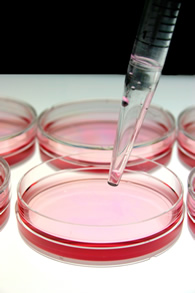

In [5]:
print("Na coluna tratamento temos as categorias:", dados["tratamento"].unique())
print("Na coluna tempo temos:", dados["tempo"].unique())
print("Na coluna dose temos:", dados["dose"].unique())
print("Nas colunas 'g' temos:", dados["g-0"].unique())

Na coluna tratamento temos as categorias: ['com_droga' 'com_controle']
Na coluna tempo temos: [24 72 48]
Na coluna dose temos: ['D1' 'D2']
Nas colunas 'g' temos: [ 1.062   0.0743  0.628  ...  0.3942  0.666  -0.8598]


## No tratamento com controle o que procura-se fazer é isolar uma variável, separando o grupo em duas vertentes: 

-> Grupo de Tratamento:

> Onde o fator testado é aplicado

-> Grupo de Controle:

> Onde o fator testado não sofre interferência

### o que é testado é exposto por 24, 48 ou 72 horas

### existem doses D1 e D2

###As colunas 'g' possuem expressões genéticas, detalhando:



> As células possuem seu citoplasma, onde se encontra seu núcleo, com o DNA...Os genes são trechos desse DNA, que possuem uma 'receita' para sintetizar uma proteína p. e.  para isso ele precisa de um RNA mensageiro pois essa proteína será sintetizada fora do núcleo. Sobre as expressões genéticas temos que: uma determinada célula em condições normais produz 4 RNA's, então dezemos que essa expressão genética é 1x, mas pode ser que essa célula receba um estímulo interno ou externo onde ela produz 8 RNA's, portanto dizemos que essa expressão genética aumentou 2x, e temos estímulos em que a célula produz por exemplo 2 RNA's, a expressão genética seria 0.5... Exemplo do dia-a-dia: a produção de insulina no nosso corpo quando estamos sem nos alimentar (com um pouco de fome p.e.), é devido a um gene que produz uma expressão genética mais baixa, digamos que aí você se alimente e seu corpo produza mais insulina, esse aumento de produção se dá pelo aumento da expressão genética desse gene do seu DNA que possui a 'receita' para a produção de insulina.


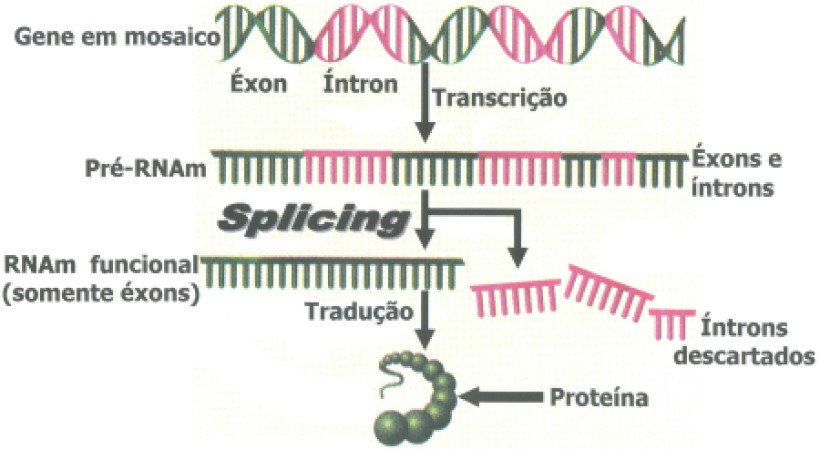






No nosso caso o estímulo é feito com drogas... Os valores na base de dados estão normalizados.

In [6]:
dados["tratamento"].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

## Tratamento com droga e com controle, por que tanta diferença?


> Os experimentos feitos com controle são células de controle onde não foram colocados nenhum fármaco... como a nossa pesquisa se baseia e ver reações à fármacos temos muito mais dados de reações a drogas, pois em cada tipo específico de célula de controle foram experimentados os mais diversos tipos de fármacos.Isso visa/é devido:


1.   Validade Estatística.
2.   Determina valores mínimos de tamanho de amostra.
3.   Diferente da engenharia, onde a tolerância dimensional costuma ser bastante restrita (na ordem de micrômetros), em bioestatística indivíduos podem ser considerados saudáveis mesmo apresentando valores de índices bastante diferentes entre si.
4.   Essa ampla tolerância contribui para que as amostras sejam pequenas.





In [7]:
print(dados["droga"].value_counts(normalize = True))

cacb2b860    0.078357
87d714366    0.030150
9f80f3f77    0.010330
8b87a7a83    0.008524
5628cb3ee    0.008482
               ...   
573c787a2    0.000042
f0d1b8dbc    0.000042
fe6105bde    0.000042
7179d2160    0.000042
f19d8c43b    0.000042
Name: droga, Length: 3289, dtype: float64


## Quantos tipos de drogas foram investigadas?



> Temos 3289 Drogas pesquisadas, conforme acima.



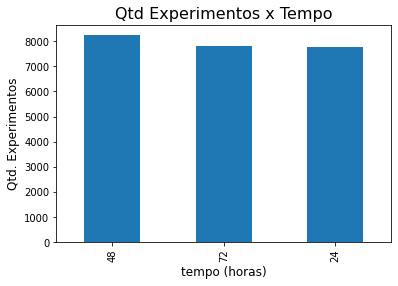

In [8]:
import matplotlib.pyplot as plt

graph1 = dados["tempo"].value_counts().plot.bar()
graph1 = plt.title("Qtd Experimentos x Tempo", fontsize = 16)
graph1 = plt.ylabel("Qtd. Experimentos", fontsize = 12)
graph1 = plt.xlabel("tempo (horas)", fontsize = 12)
graph1 = plt.show()

Acima estão especificados a quantidade de experimentos que foram feitos nos períodos respectivamente de 24, 48 e 72 horas

A seguir temos a proporcionalidade entre tratamentos com droga e com controle, assim como entre doses (2º Gráfico abaixo)

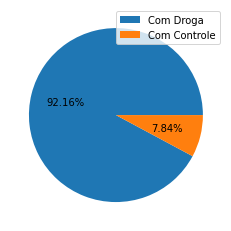

In [9]:
plt.pie(dados["tratamento"].value_counts(), autopct = "%1.2f%%")
plt.legend(labels = ["Com Droga", "Com Controle"], loc = "best")
plt.show()

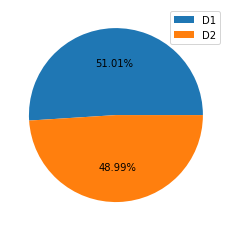

In [10]:
plt.pie(dados["dose"].value_counts(), autopct = "%1.2f%%")
plt.legend(labels = ["D1", "D2"], loc = "best")
plt.show()

Agora prosseguiremos com uma filtragem da coluna g-o para que seja armazenado em uma variável apenas os valores obtidos que foram maiores que zero.

In [11]:
dados_filtradosg0 = dados[dados["g-0"] > 0] #equivalente ao query
print(dados_filtradosg0)

                 id    tratamento  tempo dose  ...    c-96    c-97    c-98    c-99
0      id_000644bb2     com_droga     24   D1  ... -0.3981  0.2139  0.3801  0.4176
1      id_000779bfc     com_droga     72   D1  ...  0.1522  0.1241  0.6077  0.7371
2      id_000a6266a     com_droga     48   D1  ... -0.6417 -0.2187 -1.4080  0.6931
6      id_001bd861f     com_droga     24   D2  ...  2.4670  0.0357  0.1351 -0.3179
7      id_0020d0484     com_droga     48   D1  ...  0.6633  0.4562 -0.9622  0.0260
...             ...           ...    ...  ...  ...     ...     ...     ...     ...
23807  id_fff7e6992     com_droga     48   D1  ...  0.3738  0.8636  0.4494  0.1218
23808  id_fff8c2444     com_droga     72   D1  ... -0.7415  0.8413 -0.4259  0.2434
23809  id_fffb1ceed     com_droga     24   D2  ...  0.0631  0.9171  0.5258  0.4680
23811  id_fffc1c3f4  com_controle     48   D2  ...  0.2256  0.7592  0.6656  0.3808
23812  id_fffcb9e7c     com_droga     24   D1  ...  0.1732  0.7015 -0.6290  0.0740

[11

Até aqui ja podemos observar como essa base de dados oferece uma ampla gama de experimentos com os mais diversos genes, assim como tratamentos e doses, constáta-se por exemplo que cada experimento assim como cada droga possui mais de 800 colunas de dados coletados, temos cerca de 20 milhões de dados puros coletados de maneira empírica. Podendo assim, ter uma idéia do que podemos fazer manipulando esses dados, cruzando informações, utilizando Inteligência Artifial etc.

Obs: As Drogas aqui tratadas são compostos de moléculas induzidos em culturas de células e a maioria delas ainda estão em teste, ou seja, ainda não existe no mercado.Os resultados ainda devem ir para teste em laboratório, depois para pré-clínico, é um processo bem longo porém deve ser ressaltado que são novidade, que futuramente muito possivelmente serão novos medicamentos.

In [12]:
mapa = {"droga": "composto"}
dados.rename(columns = mapa, inplace = True)
display(dados)

id    tratamento  tempo dose  ...    c-96    c-97    c-98    c-99
0      id_000644bb2     com_droga     24   D1  ... -0.3981  0.2139  0.3801  0.4176
1      id_000779bfc     com_droga     72   D1  ...  0.1522  0.1241  0.6077  0.7371
2      id_000a6266a     com_droga     48   D1  ... -0.6417 -0.2187 -1.4080  0.6931
3      id_0015fd391     com_droga     48   D1  ... -1.6210 -0.8784 -0.3876 -0.8154
4      id_001626bd3     com_droga     72   D2  ...  0.1094  0.2885 -0.3786  0.7125
...             ...           ...    ...  ...  ...     ...     ...     ...     ...
23809  id_fffb1ceed     com_droga     24   D2  ...  0.0631  0.9171  0.5258  0.4680
23810  id_fffb70c0c     com_droga     24   D2  ... -0.2084 -0.1224 -0.2715  0.3689
23811  id_fffc1c3f4  com_controle     48   D2  ...  0.2256  0.7592  0.6656  0.3808
23812  id_fffcb9e7c     com_droga     24   D1  ...  0.1732  0.7015 -0.6290  0.0740
23813  id_ffffdd77b     com_droga     72   D1  ... -3.5770 -0.4775 -2.1500 -4.2520

[23814 rows x 877 columns]

In [13]:
top_compostos = dados["composto"].value_counts().index[0:20]
compostos_filtrados = dados.query("composto in @top_compostos")

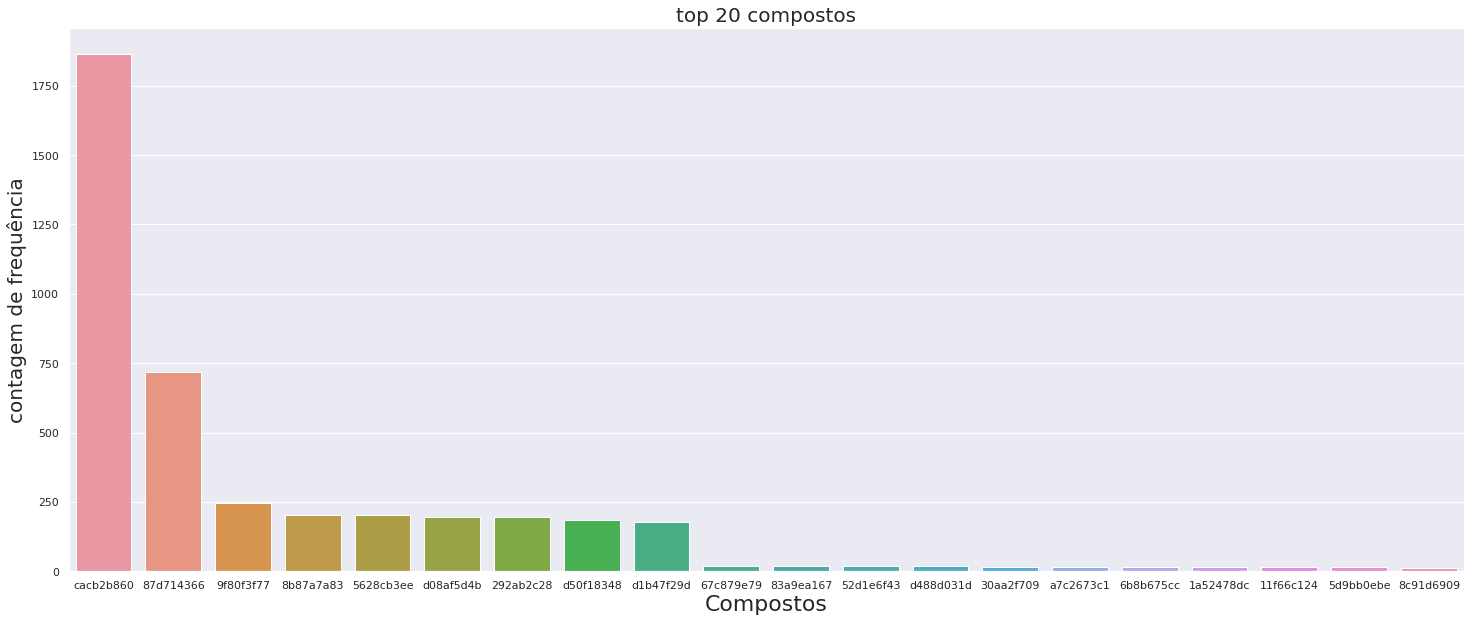

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (25 , 10))
sns.set()
ax = sns.countplot(x = "composto", data = compostos_filtrados, order = top_compostos)
ax.set_title("top 20 compostos", fontsize = 20)
ax.set_xlabel("Compostos", fontsize = 22)
ax.set_ylabel("contagem de frequência", fontsize = 20)
plt.show()

In [15]:
print("Temos ", len(dados["g-0"]), " dados, na coluna g-0")
print("Dos quais ", len(dados["g-0"].unique()), " são valores não repetidos")

Temos  23814  dados, na coluna g-0
Dos quais  14367  são valores não repetidos


### Os valores máximos e mínimos, ou seja a variação de resultados dentro da coluna g-0 variam da seguinte forma:

In [16]:
dados["g-0"].max()

10.0

In [17]:
dados["g-0"].min()

-5.513

### Para melhor Visualização desse tipo de informação fazemos um histograma:

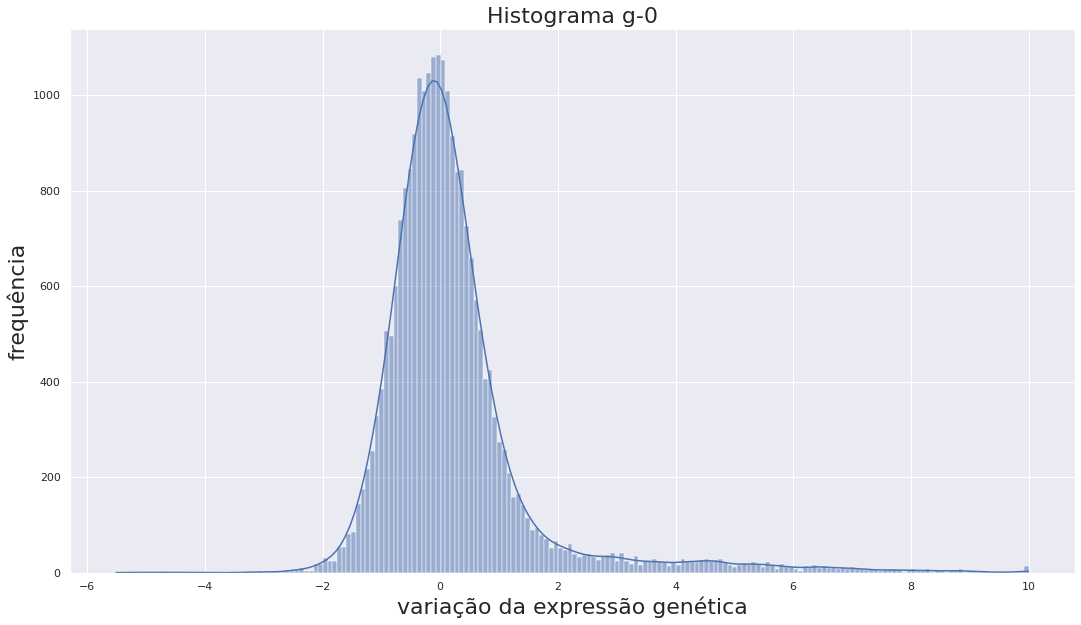

In [18]:
plt.figure(figsize = (18, 10))
hist1 = sns.histplot(x='g-0', data=dados, binwidth = 0.08, kde = True)
hist1.set_title("Histograma g-0", fontsize = 22)
hist1.set_xlabel("variação da expressão genética", fontsize = 22)
hist1.set_ylabel("frequência", fontsize = 22)
plt.show()

### Legenda: count = contagem de valores não-nulos em cada coluna
### mean = média dos valores obtidos nos testes
### std = desvio padrão
### min = valor mínimos obtido
### 25% = percentual mais baixo de valores obtidos
### 50% = percentual médio
### 75% = percentual mais alto de valores obtios
### max = valor máximo obtido

In [19]:
dados.loc[:, "g-0" : "g-771"].describe()

g-0           g-1  ...         g-770         g-771
count  23814.000000  23814.000000  ...  23814.000000  23814.000000
mean       0.248366     -0.095684  ...     -0.219210      0.101524
std        1.393399      0.812363  ...      1.326193      1.417674
min       -5.513000     -5.737000  ...    -10.000000    -10.000000
25%       -0.473075     -0.562200  ...     -0.554400     -0.523800
50%       -0.008850     -0.046600  ...      0.028700     -0.006500
75%        0.525700      0.403075  ...      0.496400      0.536950
max       10.000000      5.039000  ...     10.000000     10.000000

[8 rows x 772 columns]

### Histograma com a média obtida em todos os experimentos com o gene "g-0"

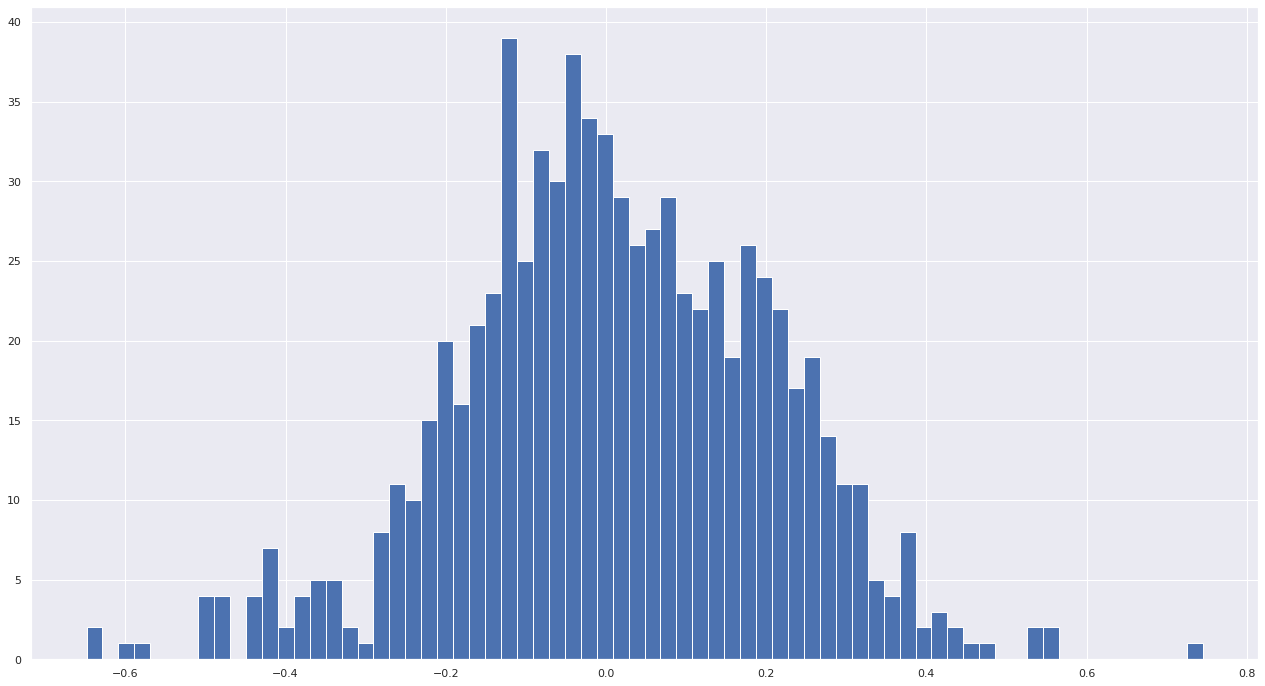

In [20]:
plt.figure(figsize = (22, 12))
hist2 = dados.loc[:, "g-0" : "g-771"].describe().T["mean"].hist(bins = 70)

## Se quiser saber mais sobre esse projeto open-source visite: "https://clue.io/"  Desvende a biologia com o maior dataset do mundo de expressão gênica impulsionada por perturbação.

## Histograma com Média de 'c-0' até 'c-99':

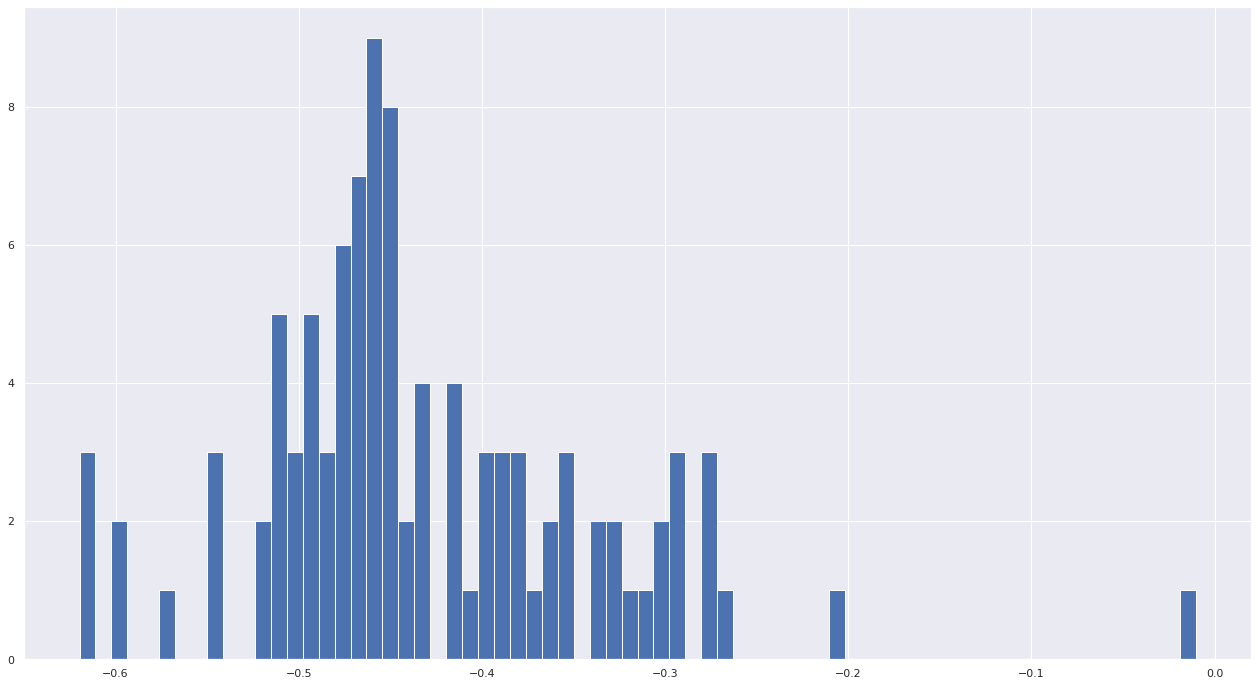

In [21]:
plt.figure(figsize = (22, 12))
hist3 = dados.loc[:, "c-0" : "c-99"].describe().T["mean"].hist(bins = 70)

Obs: cada "c" é uma linhagem celular tanto patogênicas quanto saudáveis
Um exemplo interessante é a Talidomida, quando descoberto esse medicamento era usado para combater enjôo em mulheres grávidas, porém havia um grave efeito colateral nos bebês, hoje, graças as novas técnicas como a usada aqui, que armazena o maior número possível de informações em uma base de dados, e depois as informações são cruzadas, é possível saber se o medicamento afeta alguma outra determinada célula causando um efeito colateral indesejado que o torna inviável, no caso da Talidomida foi descoberto um novo mecanismo de ação, que o torna viável no combate a tumores malignos, porém é necessário acompanhamento durante o uso, além de não estar na condição de gravidez, pois o efeito colateral permanece.

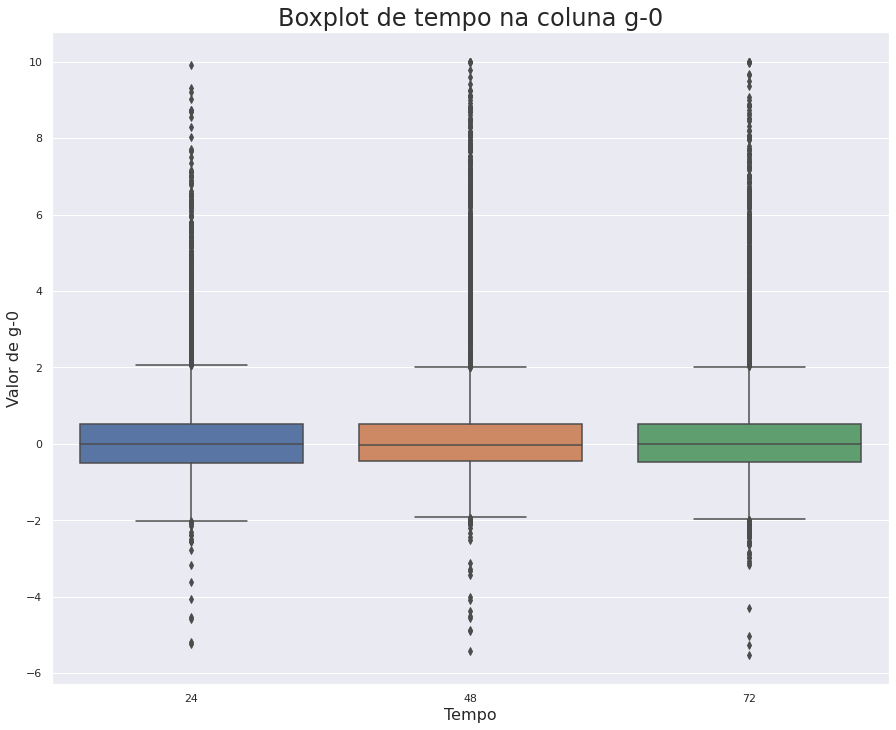

In [22]:
plt.figure(figsize=(15, 12))
ax = sns.boxplot(x='tempo', y='g-0', data=dados)
ax.set_title('Boxplot de tempo na coluna g-0', fontsize=24)
ax.set_xlabel('Tempo', fontsize=16)
ax.set_ylabel('Valor de g-0', fontsize=16)
plt.show()

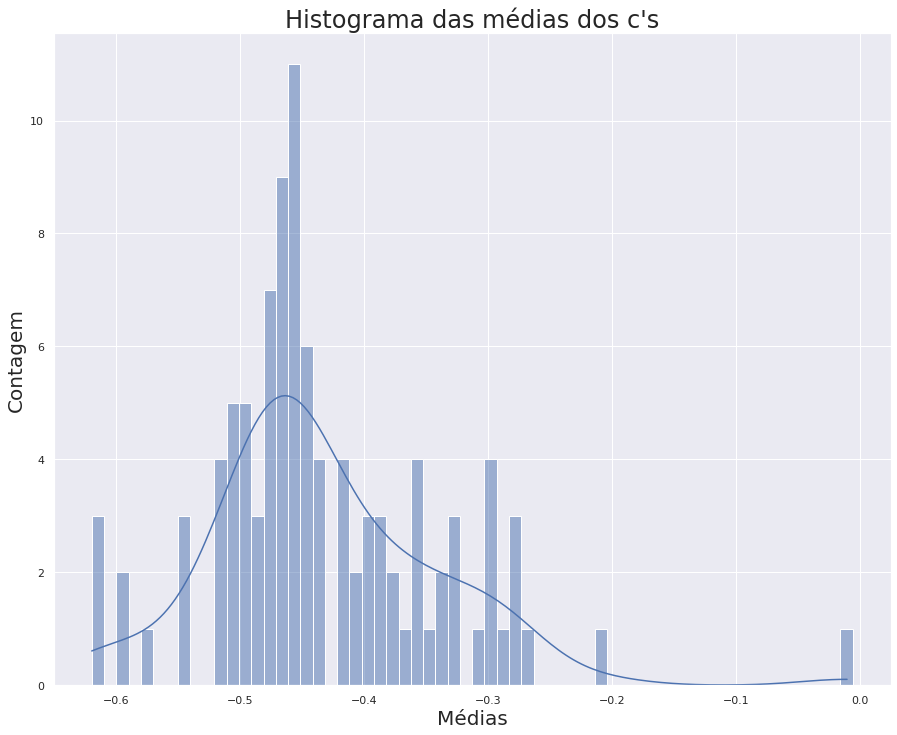

In [23]:
medias_c = dados.loc[:, 'c-0':'c-99'].describe().T['mean']

plt.figure(figsize=(15, 12))
ax = sns.histplot(data=medias_c, binwidth = 0.0099, kde = True)
ax.set_title('Histograma das médias dos c\'s', fontsize=24)
ax.set_xlabel('Médias', fontsize = 20)
ax.set_ylabel('Contagem', fontsize = 20)
plt.show()

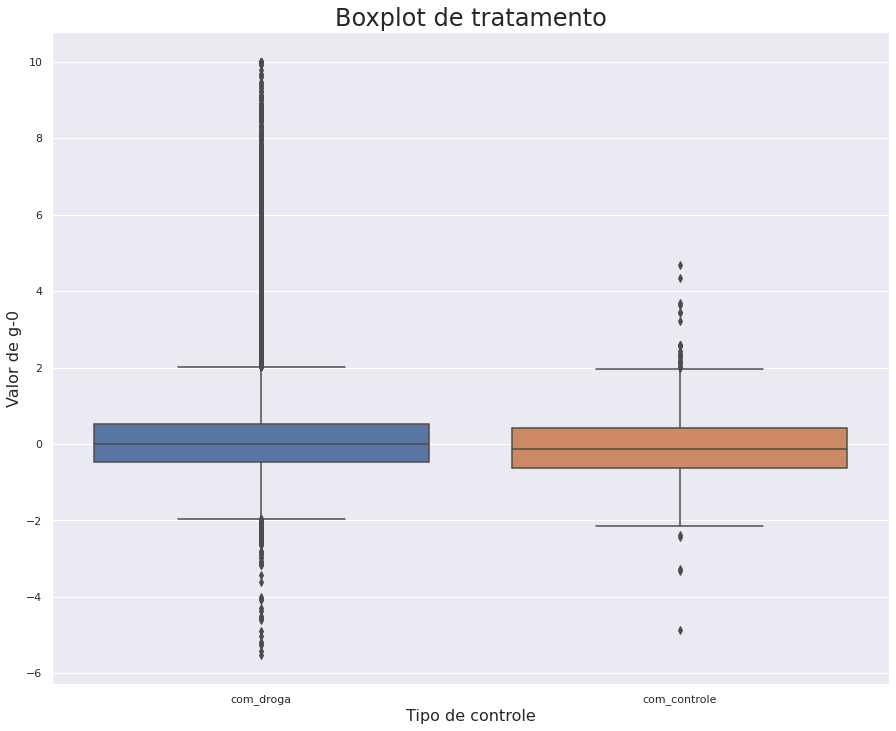

In [24]:
plt.figure(figsize=(15, 12))
ax = sns.boxplot(x='tratamento', y='g-0', data=dados)
ax.set_title('Boxplot de tratamento', fontsize=24)
ax.set_xlabel('Tipo de controle', fontsize=16)
ax.set_ylabel('Valor de g-0', fontsize=16)
plt.show()

In [25]:
pd.crosstab(dados["dose"], dados["tempo"])

tempo    24    48    72
dose                   
D1     3886  4354  3907
D2     3886  3896  3885

cruzamento dos dados de dose e tempo com tratamento:

In [26]:
pd.crosstab([dados["dose"], dados["tempo"]], dados["tratamento"])

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

proporção:

In [27]:
pd.crosstab([dados["dose"], dados["tempo"]], dados["tratamento"], normalize = "index")

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

In [28]:
#Tabela de frequencia com groupby e unstack
dados.groupby(['tratamento','dose','tempo']).size().unstack(0)

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [29]:
#Tabela de frequencia com crosstab normalizado por coluna
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], normalize='columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

explorando com outros agregadores:

In [30]:
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], values=dados['g-0'], aggfunc='first')

tratamento  com_controle  com_droga
dose tempo                         
D1   24          -0.1636     1.0620
     48          -0.6696     0.6280
     72          -0.6723     0.0743
D2   24          -1.3200     2.0440
     48           0.4860    -0.0630
     72           0.7344    -0.3254

In [31]:
#dados cruzados te dose e tempo, com tratamento, compostos, na coluna g-0, com valores médios, min e max
dados.groupby(by=['dose','tempo','tratamento'])[['g-0']].agg(['mean','min','max'])

g-0               
                             mean    min     max
dose tempo tratamento                           
D1   24    com_controle -0.251760 -2.370   3.226
           com_droga     0.367996 -5.183   9.908
     48    com_controle -0.122773 -3.276   3.423
           com_droga     0.412469 -5.420  10.000
     72    com_controle -0.295271 -2.086   2.584
           com_droga     0.286250 -5.261   9.355
D2   24    com_controle  0.010754 -2.135   2.601
           com_droga     0.115253 -5.233   7.167
     48    com_controle  0.013174 -4.859   4.335
           com_droga     0.214480 -4.567  10.000
     72    com_controle  0.070250 -1.909   4.670
           com_droga     0.253439 -5.513  10.000

In [32]:
#A função .melt constrói uma nova coluna com todos os valores. Além disso, muda o index da tabela.
dados.melt(id_vars=['tempo','dose', 'tratamento'], value_vars=['g-0', 'g-1'], var_name='variável', value_name='valor')

tempo dose    tratamento variável   valor
0         24   D1     com_droga      g-0  1.0620
1         72   D1     com_droga      g-0  0.0743
2         48   D1     com_droga      g-0  0.6280
3         48   D1     com_droga      g-0 -0.5138
4         72   D2     com_droga      g-0 -0.3254
...      ...  ...           ...      ...     ...
47623     24   D2     com_droga      g-1 -0.0636
47624     24   D2     com_droga      g-1  0.3478
47625     48   D2  com_controle      g-1  0.3756
47626     24   D1     com_droga      g-1  0.2324
47627     72   D1     com_droga      g-1  1.0240

[47628 rows x 5 columns]

In [33]:
dados[["g-0", "g-3"]]

g-0     g-3
0      1.0620 -0.6208
1      0.0743  0.0604
2      0.6280 -0.0764
3     -0.5138  0.5288
4     -0.3254  0.6919
...       ...     ...
23809  0.1394 -0.5080
23810 -1.3260  0.9905
23811  0.3942 -0.7389
23812  0.6660  0.2044
23813 -0.8598  0.7952

[23814 rows x 2 columns]

explorando relações com scatterplot:

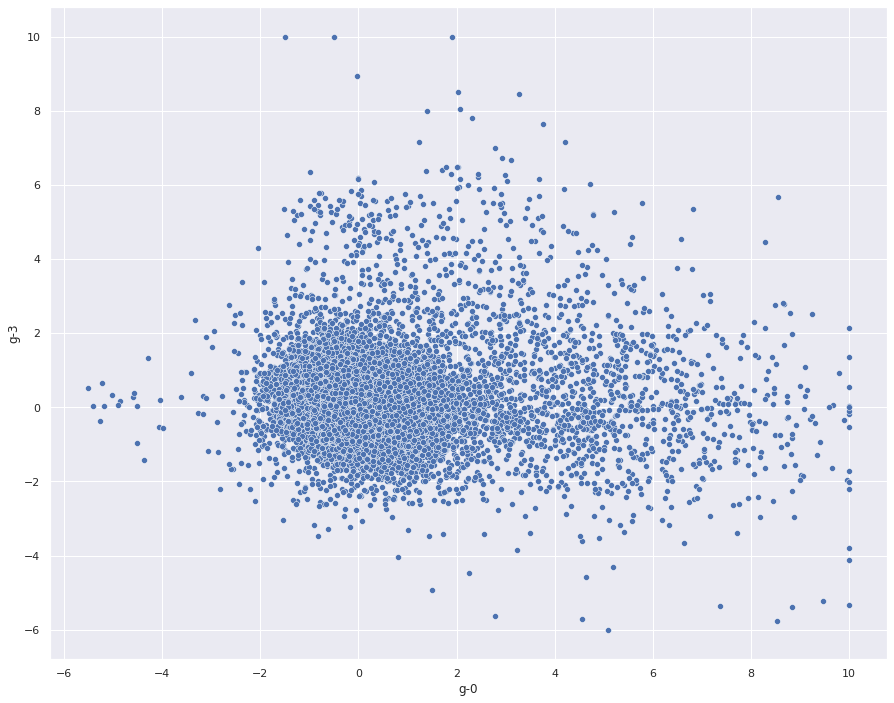

In [34]:
#relação entre g-0 e g-3
plt.figure(figsize=(15, 12))
GraphP = sns.scatterplot(x = "g-0", y = "g-3", data=dados)

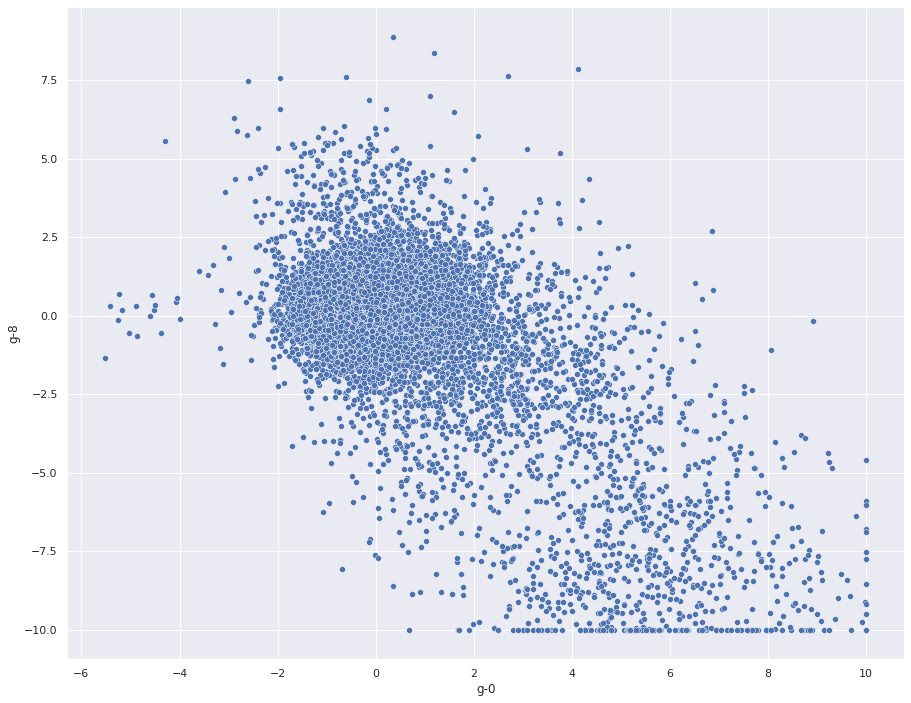

In [35]:
#relação entre g-0 e g-8
plt.figure(figsize=(15, 12))
GraphP = sns.scatterplot(x = "g-0", y = "g-8", data=dados)

por este segundo gráfico podemos ver que quanto maior g-0, menor g-8
pelo gráfico seguinte veremos a diferença entre com composto e com controle e por tempo

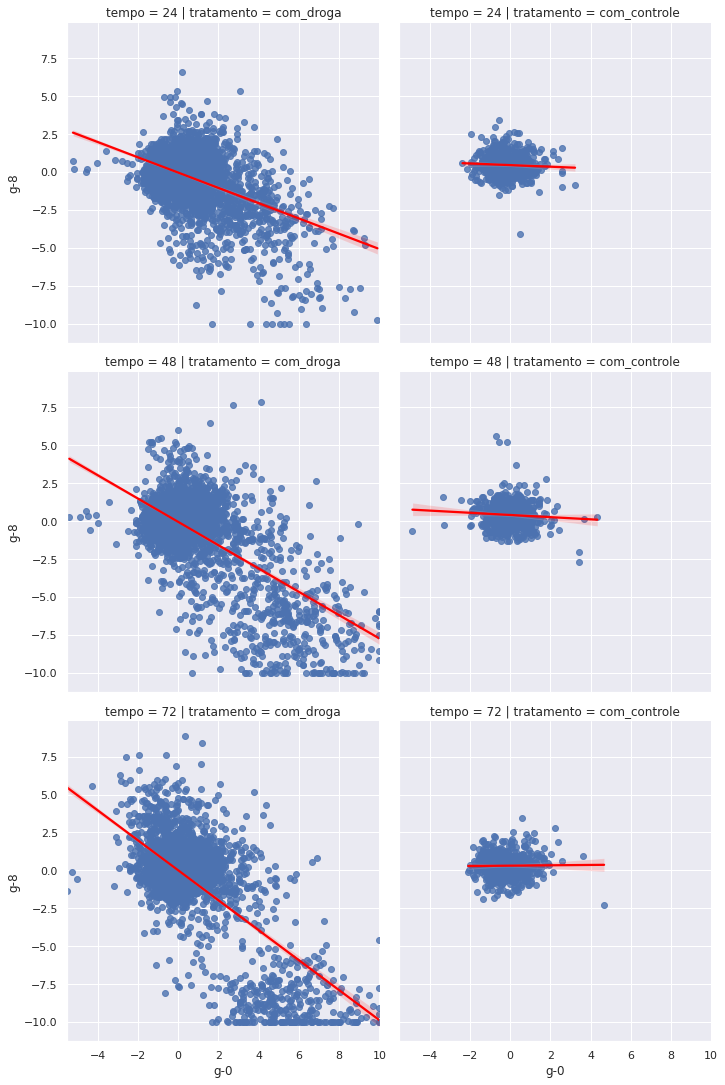

In [36]:
PPlot = sns.lmplot(data = dados, x = "g-0", y = "g-8", line_kws = {'color' : 'red'}, col = "tratamento", row = "tempo")

vemos a relação entre a expressão gênica e com tratamento com os compostos. A seguir veremos a correlação entre todas as expressões gênicas:

In [37]:
dados.loc[:, "g-0" : "g-771"].corr()

g-0       g-1       g-2  ...     g-769     g-770     g-771
g-0    1.000000  0.086032  0.176188  ... -0.127375 -0.514201  0.405908
g-1    0.086032  1.000000 -0.054518  ... -0.006866 -0.095108 -0.032233
g-2    0.176188 -0.054518  1.000000  ...  0.014489 -0.078661  0.103985
g-3    0.011266 -0.027855  0.042633  ... -0.206077 -0.002142  0.058219
g-4    0.403153  0.193647  0.013968  ... -0.172727 -0.363673  0.250713
...         ...       ...       ...  ...       ...       ...       ...
g-767 -0.052622 -0.003378 -0.053149  ...  0.065450  0.008603 -0.001136
g-768  0.300241 -0.030756  0.115415  ...  0.079364 -0.382607  0.351651
g-769 -0.127375 -0.006866  0.014489  ...  1.000000  0.135853 -0.083713
g-770 -0.514201 -0.095108 -0.078661  ...  0.135853  1.000000 -0.425063
g-771  0.405908 -0.032233  0.103985  ... -0.083713 -0.425063  1.000000

[772 rows x 772 columns]

contruindo um Heatmap de correlações gênicas:

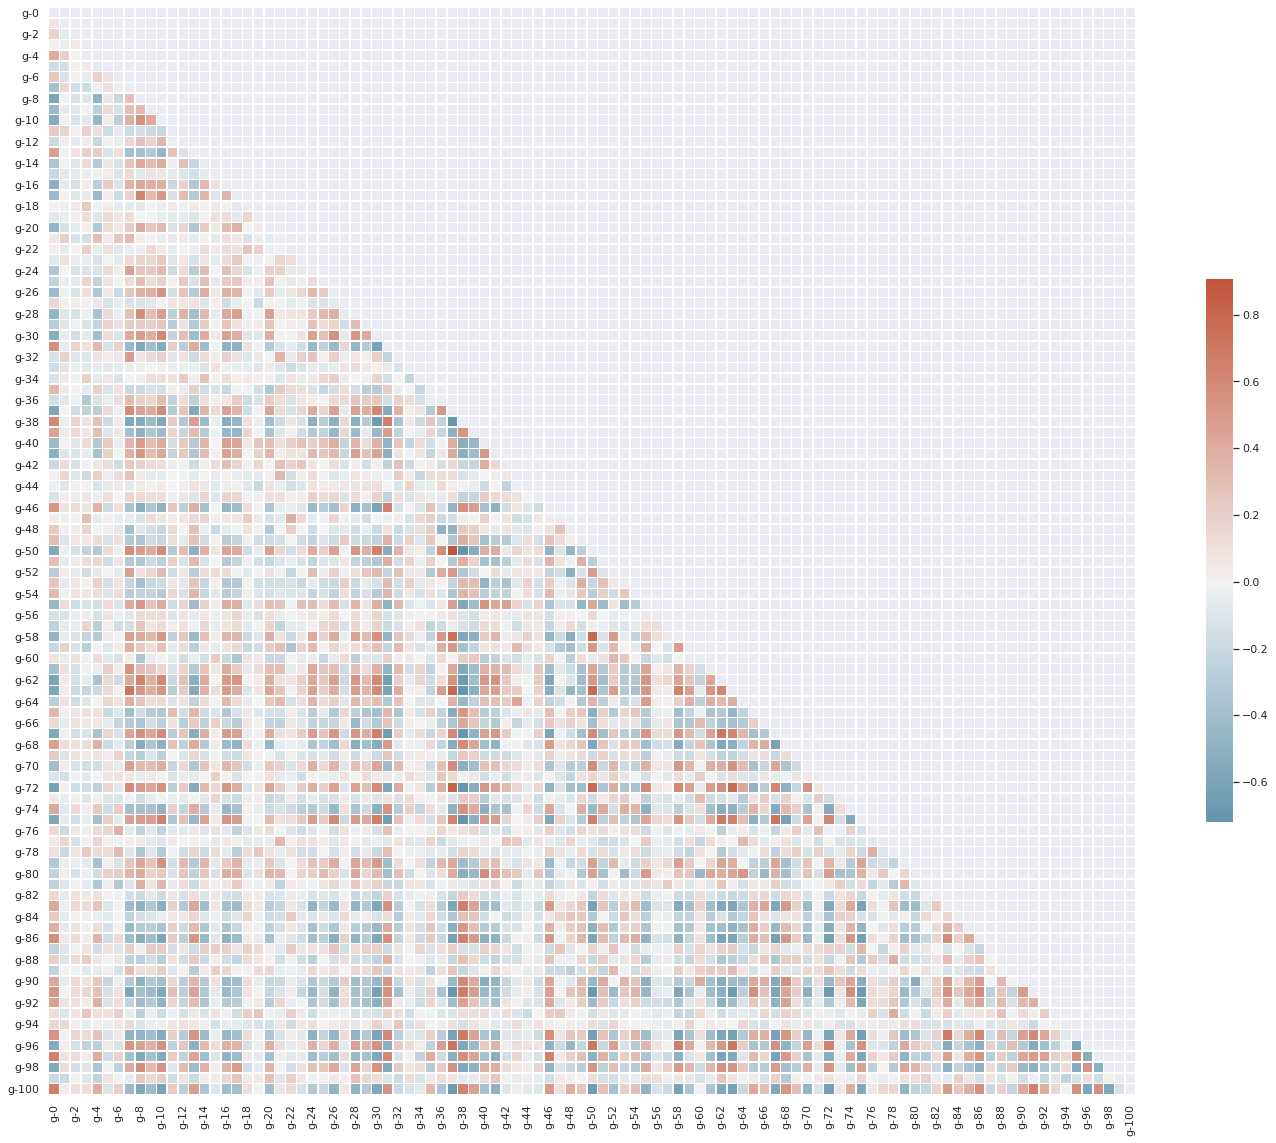

In [38]:
import numpy as np
# Compute the correlation matrix
corr = dados.loc[:, "g-0" : "g-100"].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

a relação acima não representa necessariamente causalidade, a seguir a correlação celular

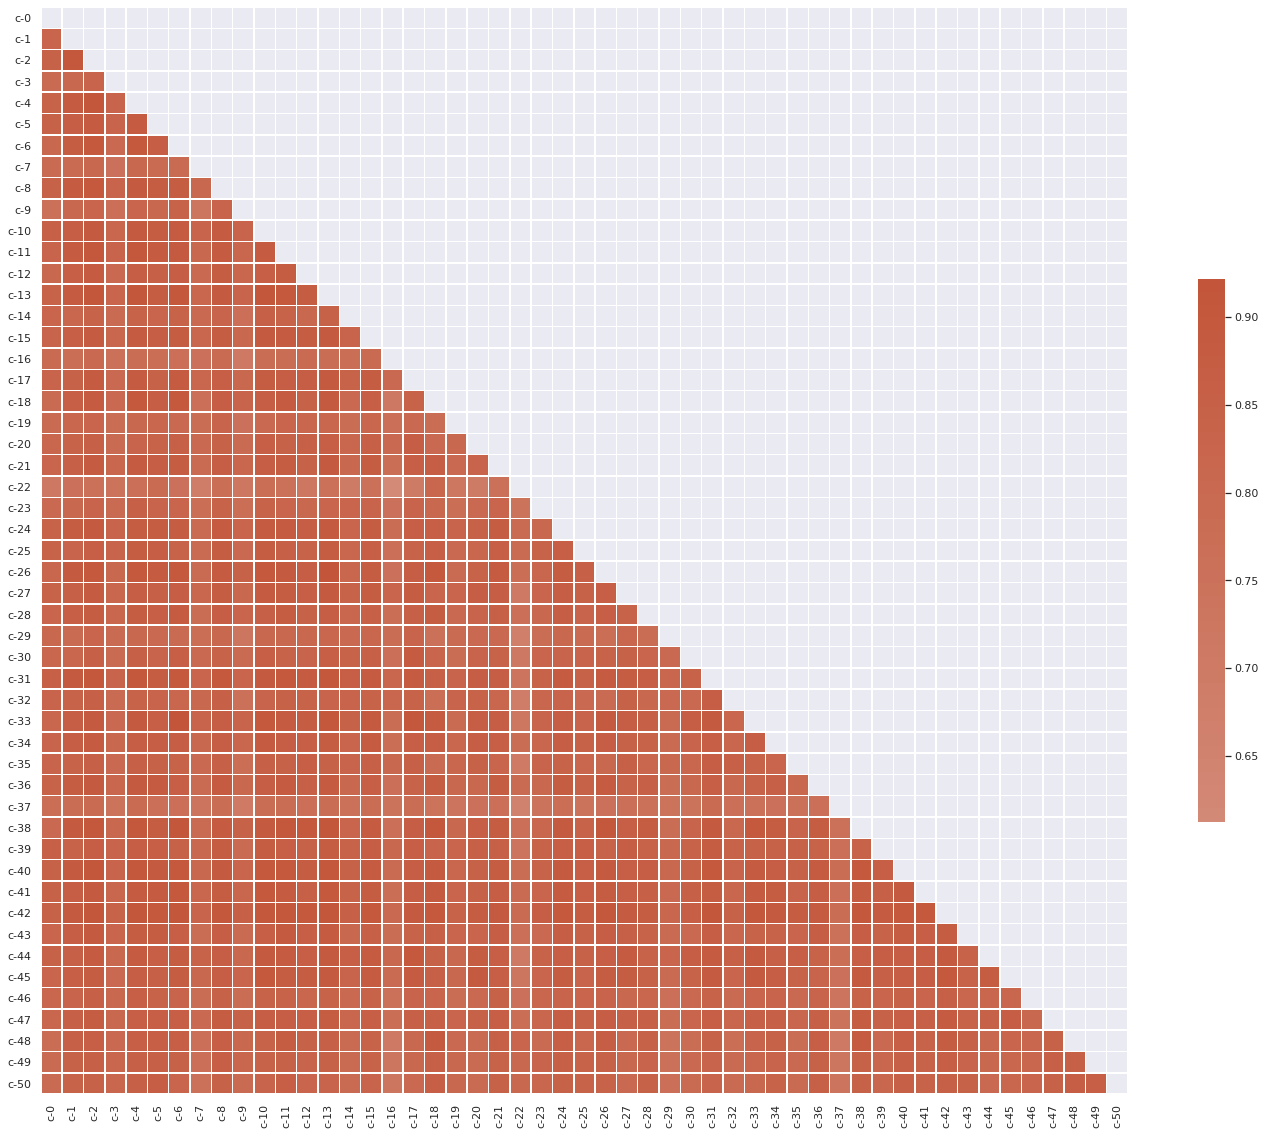

In [39]:
import numpy as np
# Compute the correlation matrix
corr_celulas = dados.loc[:, "c-0" : "c-50"].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_celulas, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_celulas, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Calculando as relações entre "g" e "c" e explorando os dados:

In [40]:
corr = pd.concat([dados.loc[:,'g-0':'g-500'],dados.loc[:,'c-0':'c-99']],axis=1).corr()

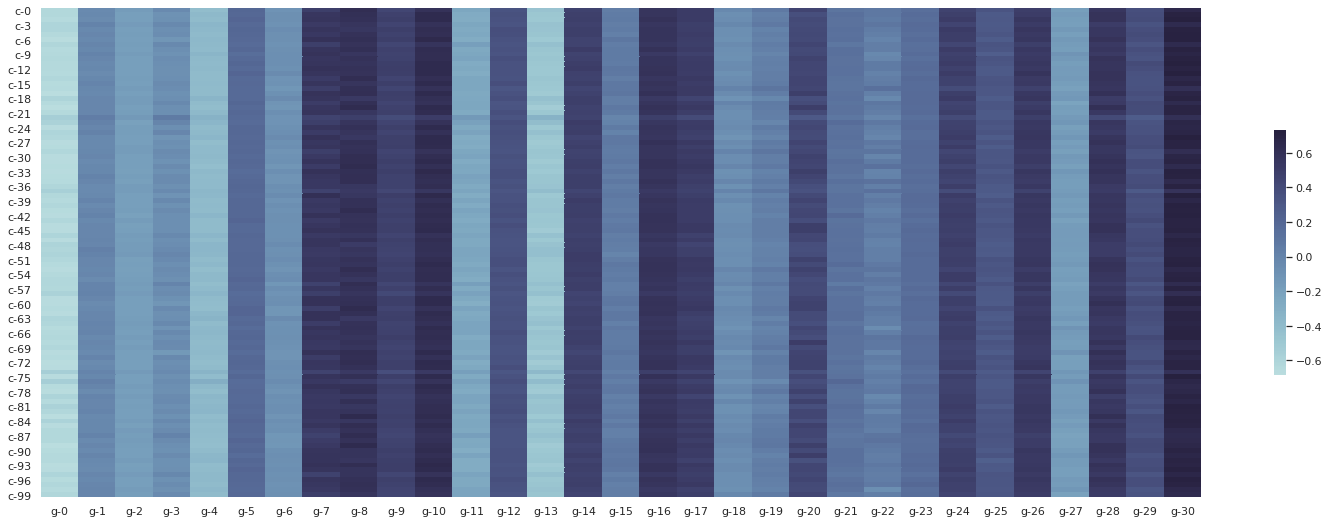

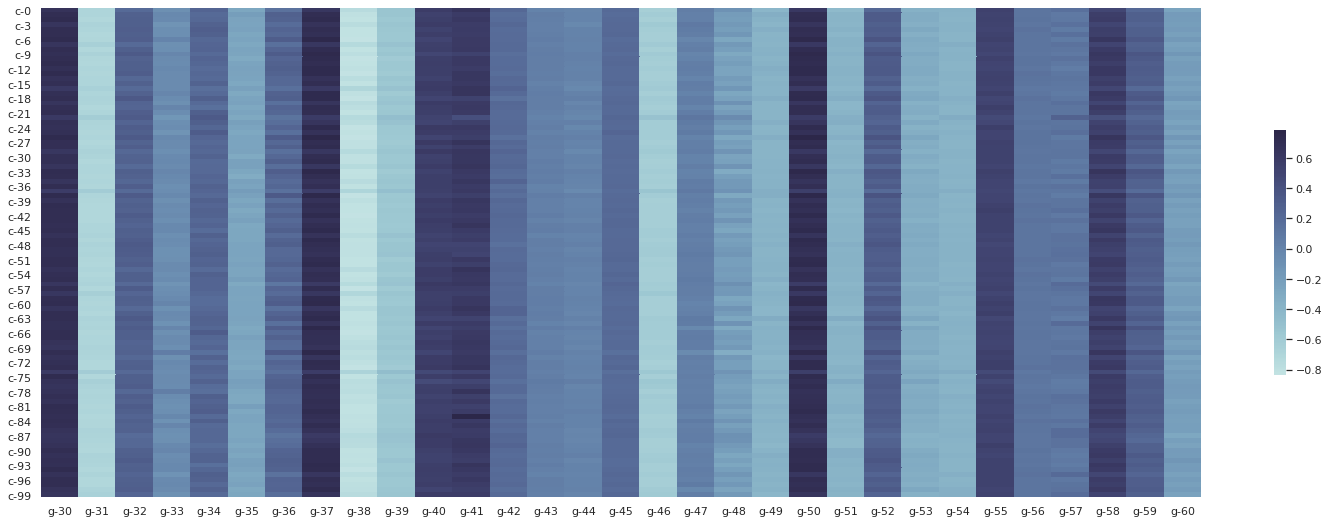

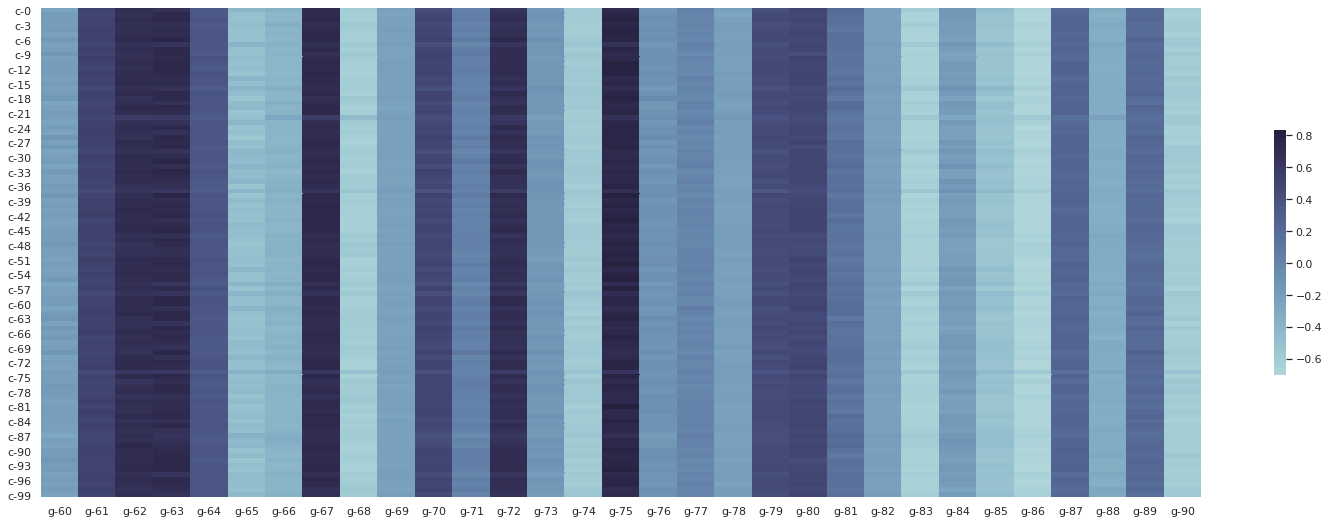

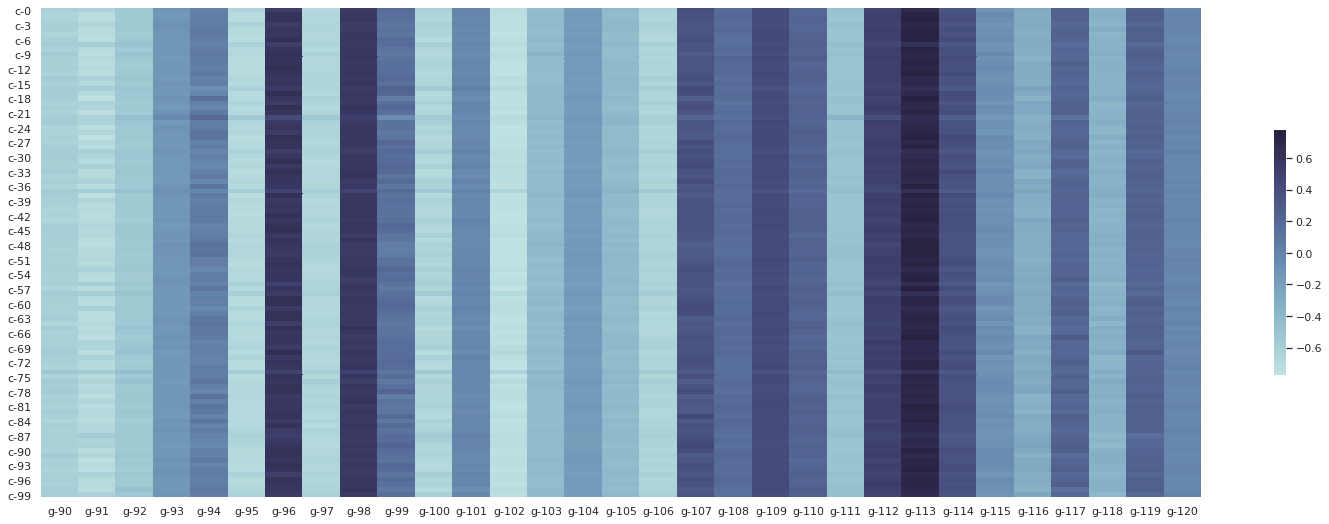

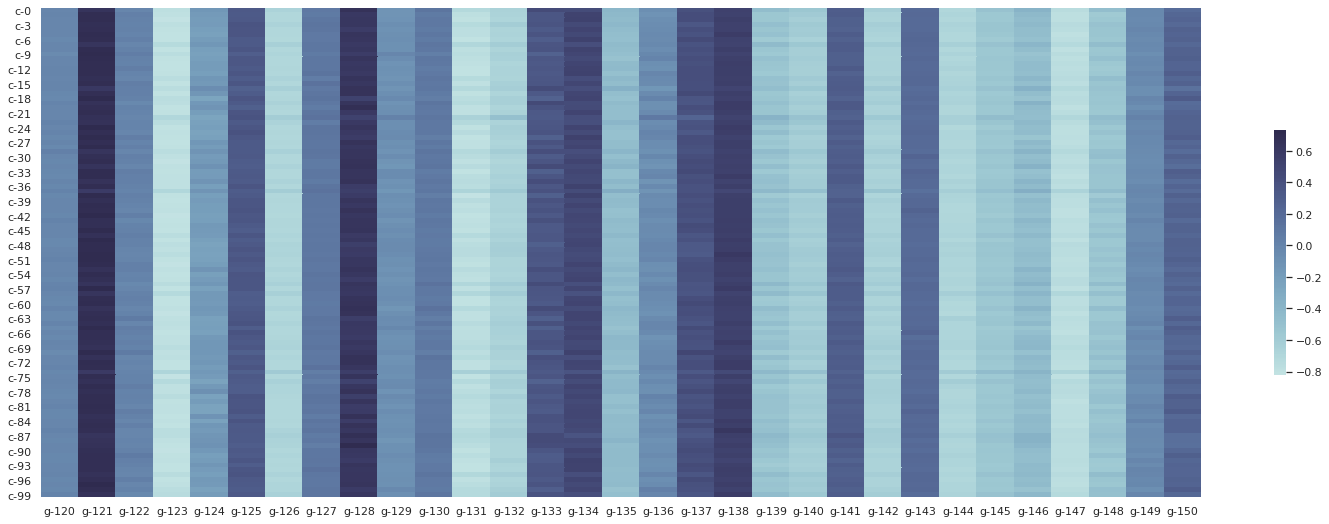

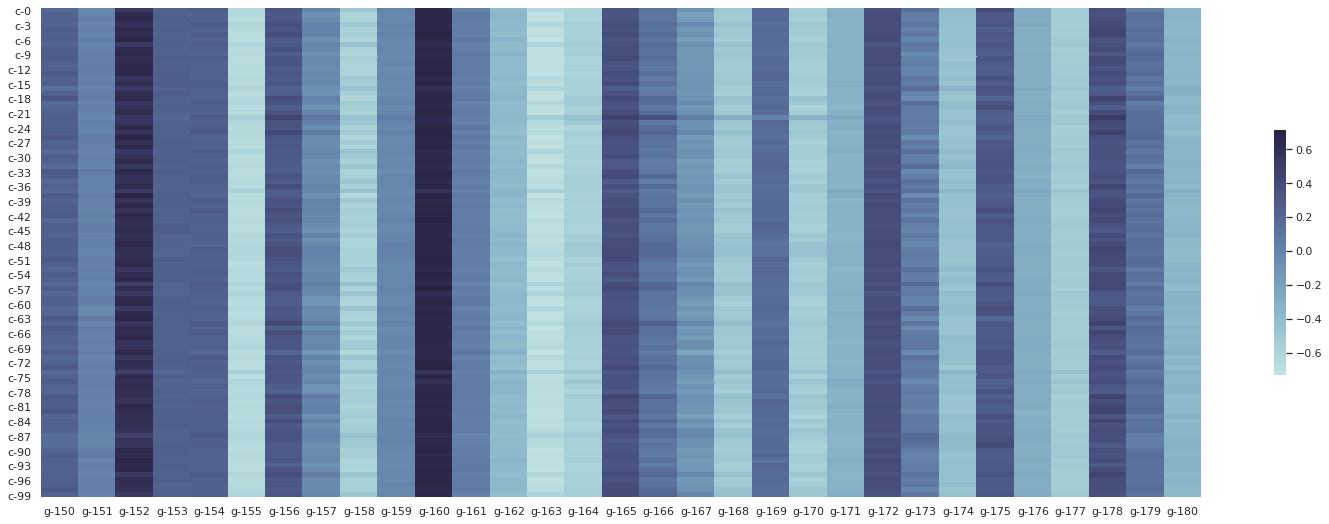

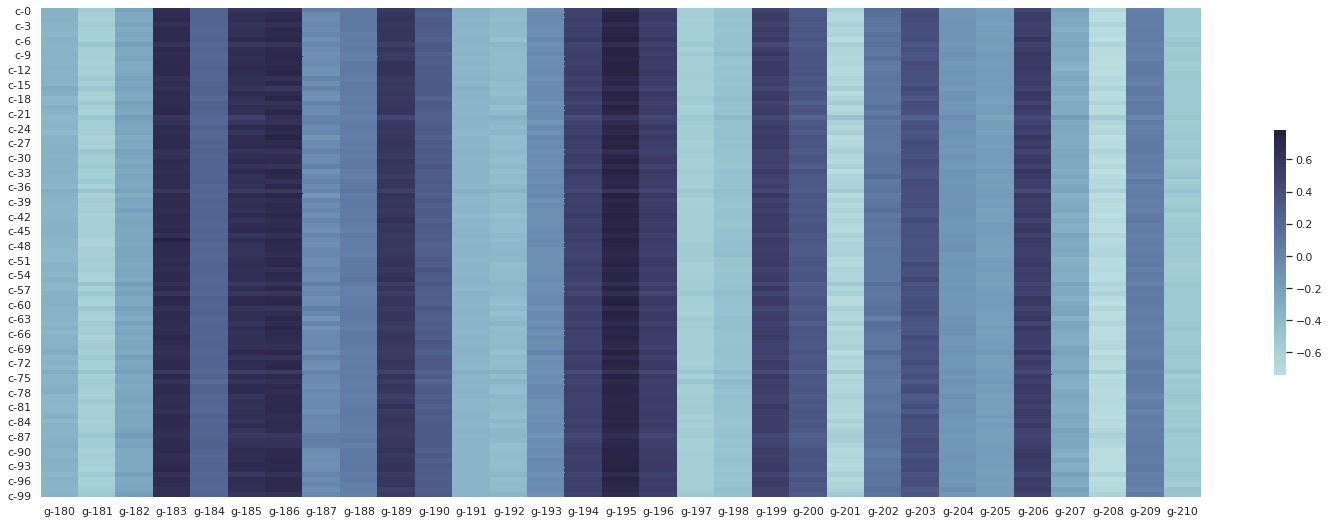

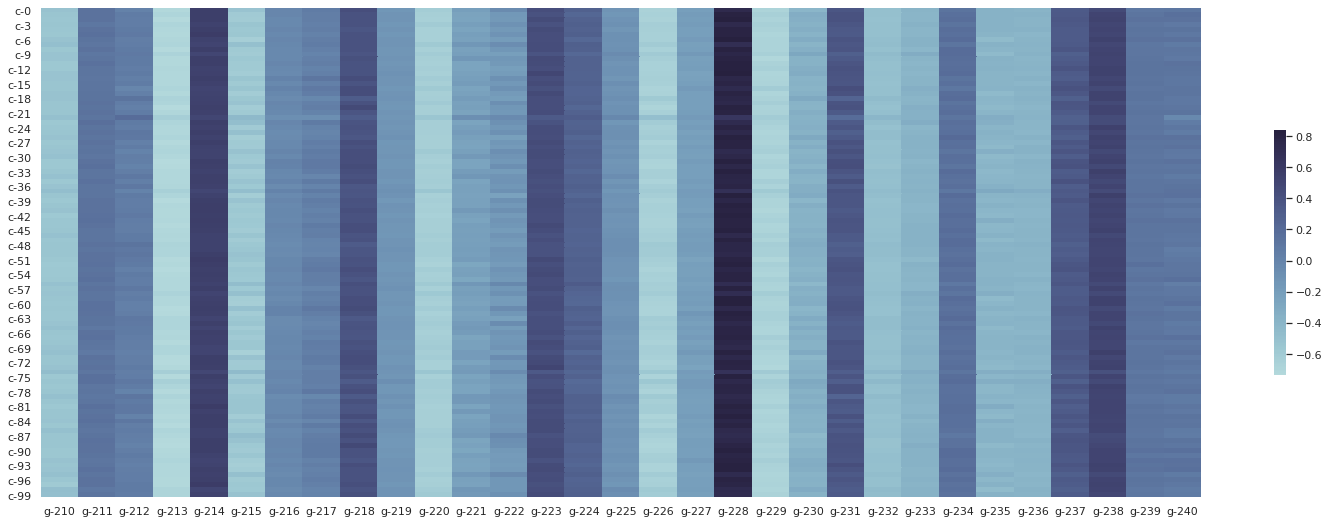

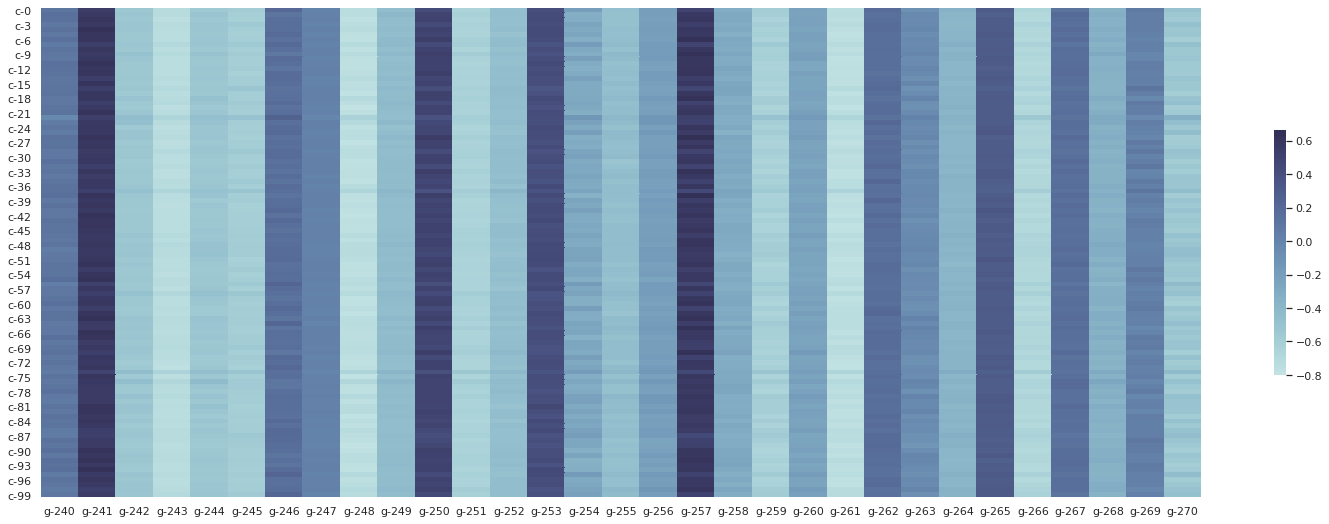

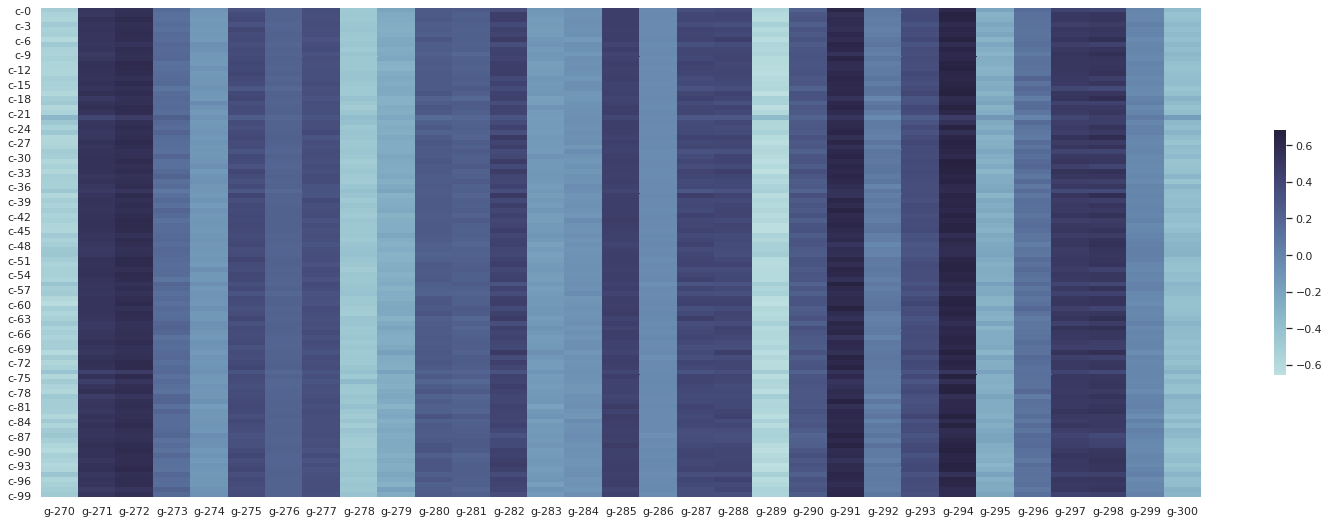

In [41]:
for a in range(10):
  corr_to_plot = corr.loc[f'c-0':f'c-99',f'g-{0+30*a}':f'g-{30+30*a}']
  # Set up the matplotlib figure
  f, ax = plt.subplots(figsize=(26, 9))

  # Generate a custom diverging colormap
  cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)

  # Draw the heatmap with the mask and correct aspect ratio
  sns.heatmap(corr_to_plot, cmap=cmap, center=0,
              square=False, linewidths=0, cbar_kws={"shrink": .5})
  plt.show()

In [42]:
#Teste apenas genes que estão no com controle:
#Exemplo em codigo
corr_com_controle = pd.concat([dados.query('tratamento == "com_controle"').loc[:,'g-0':'g-500'],dados.loc[:,'c-0':'c-99']],axis=1).corr()

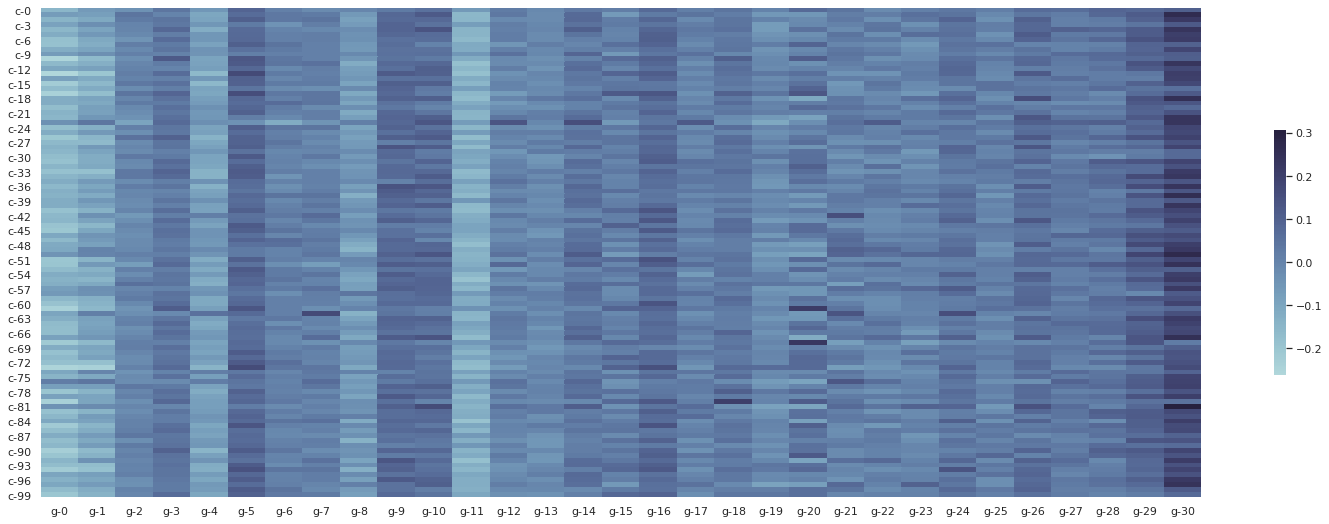

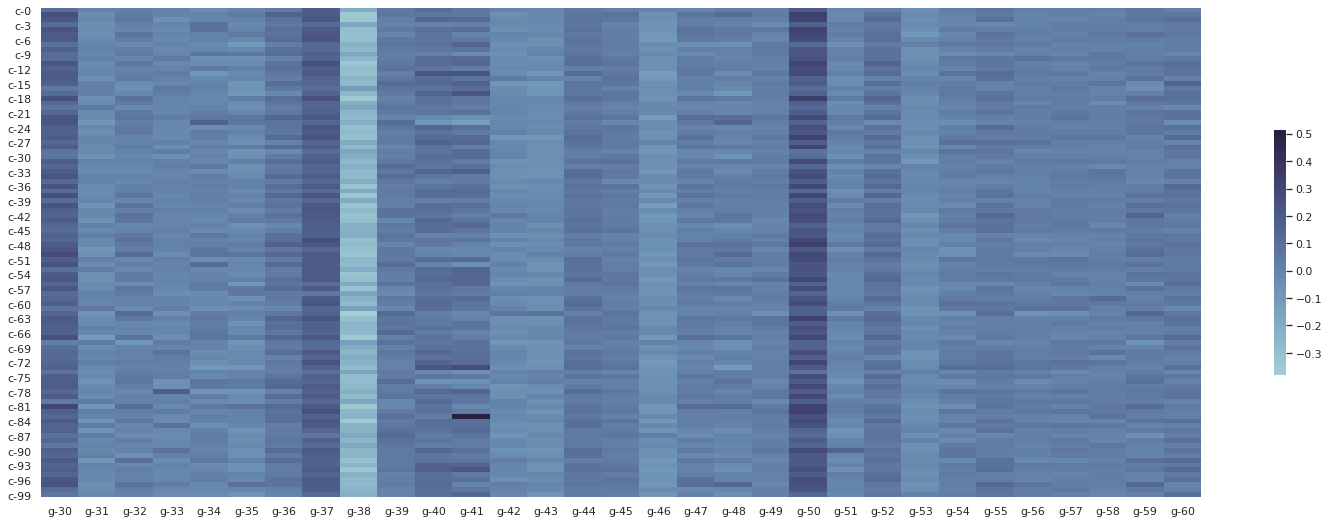

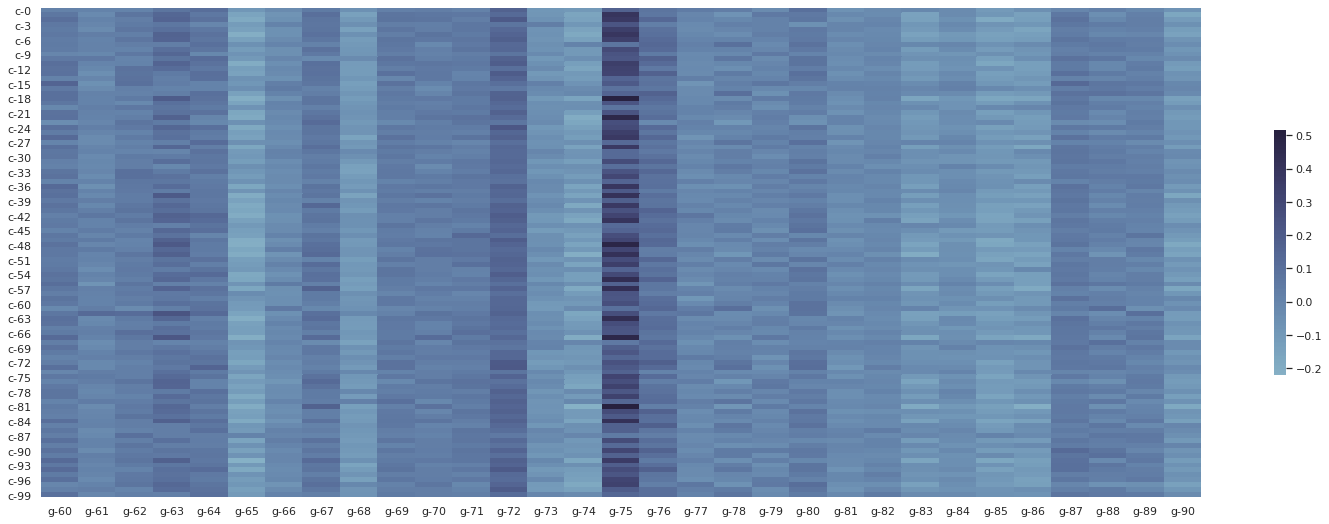

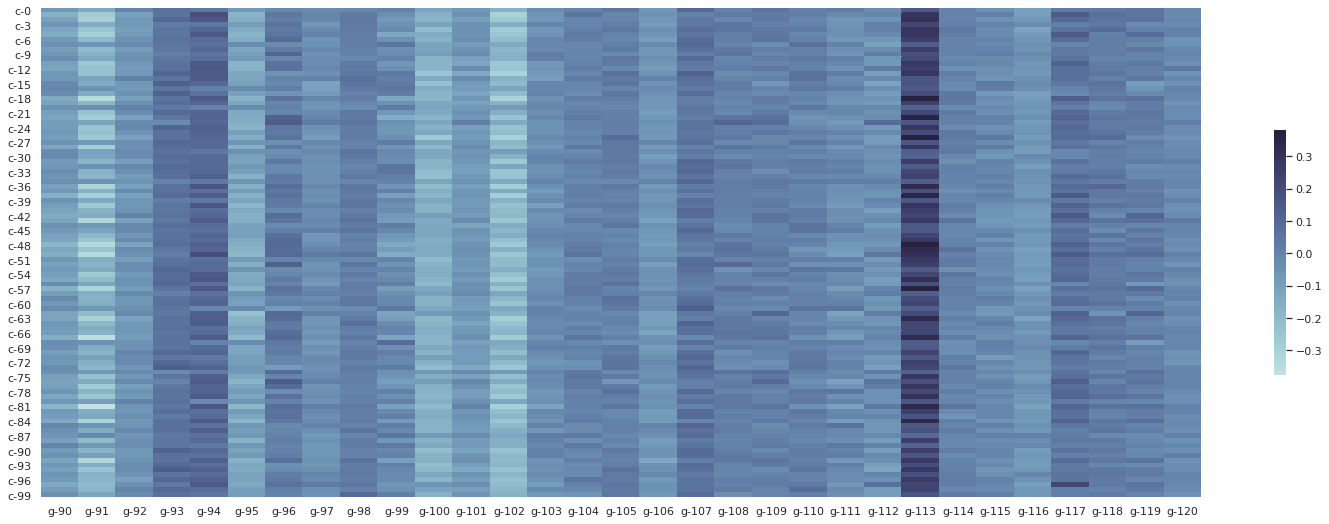

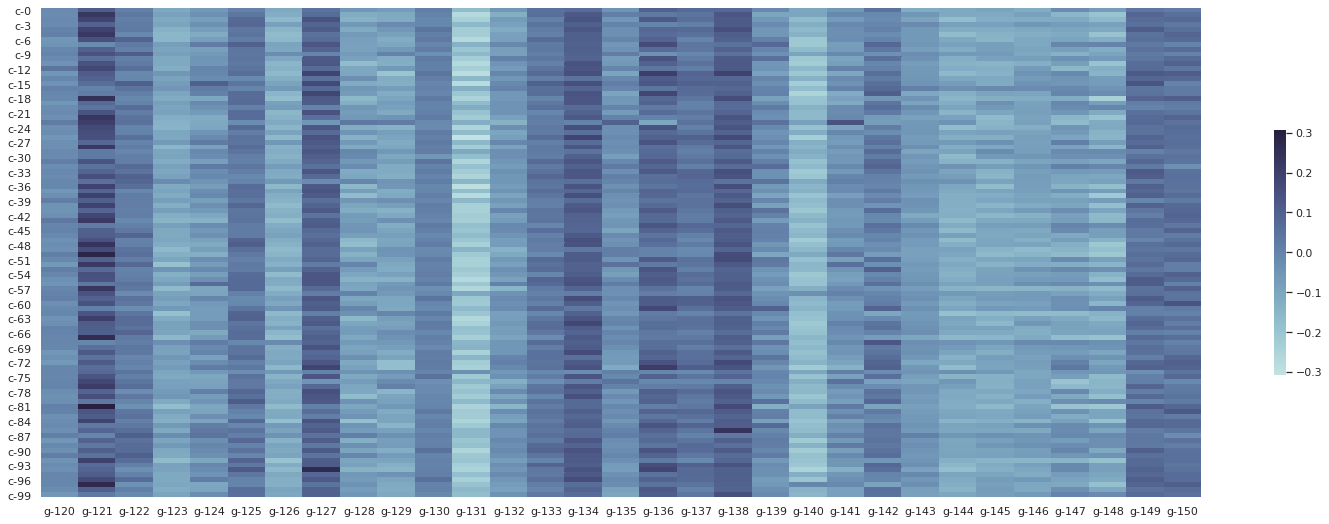

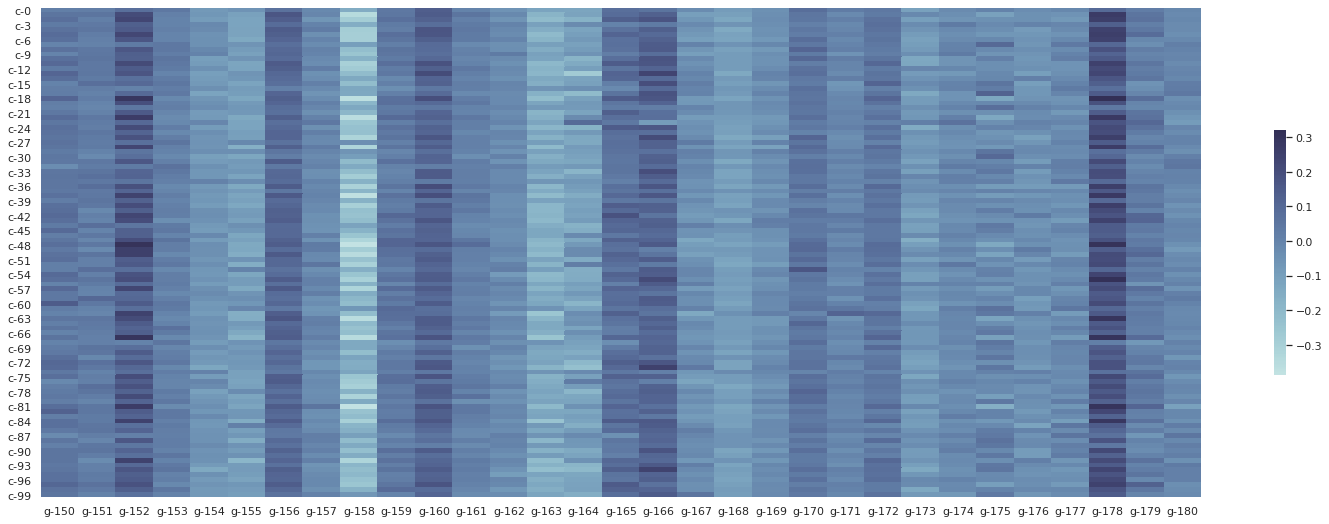

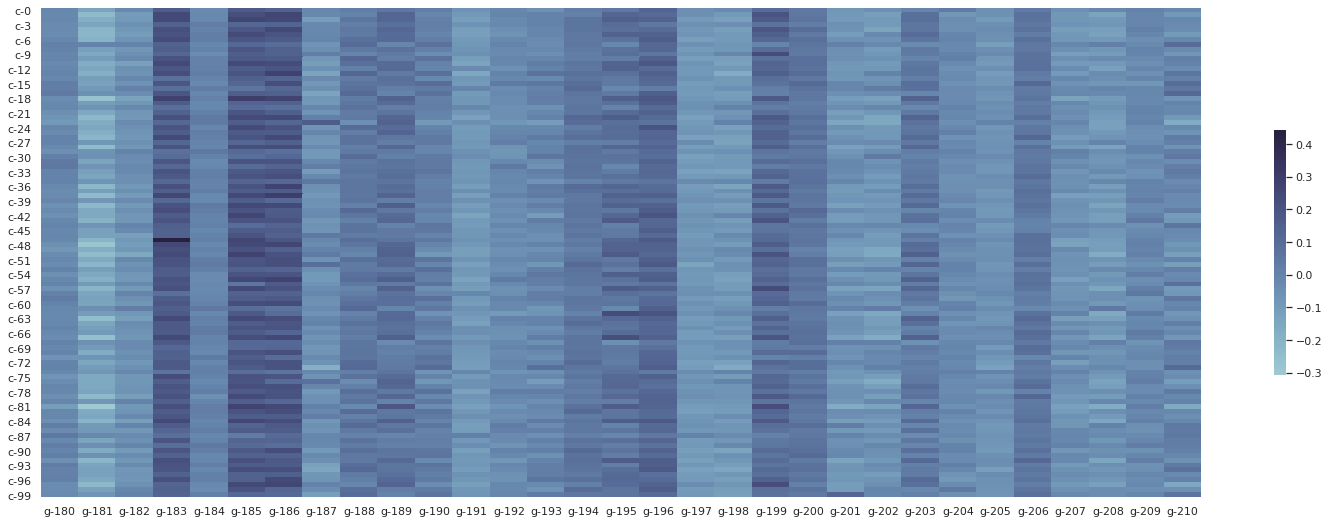

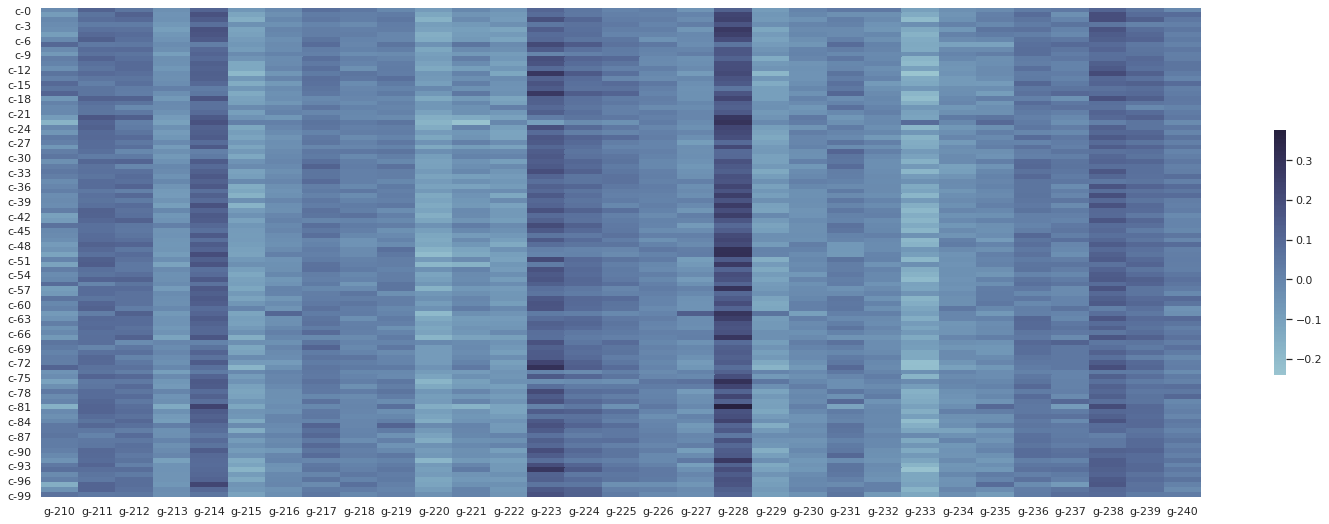

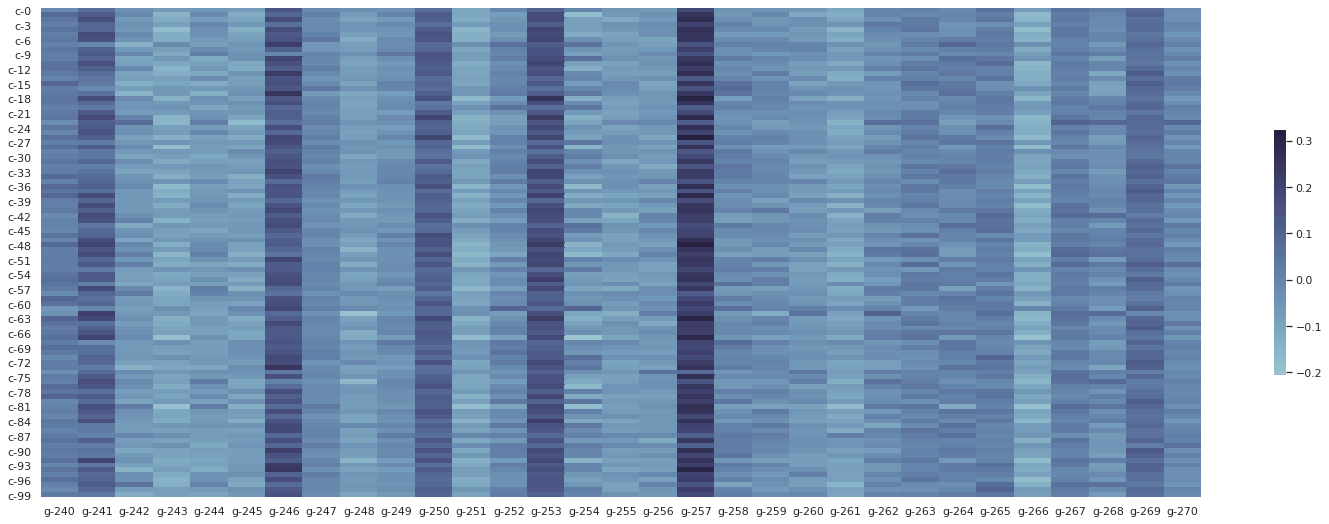

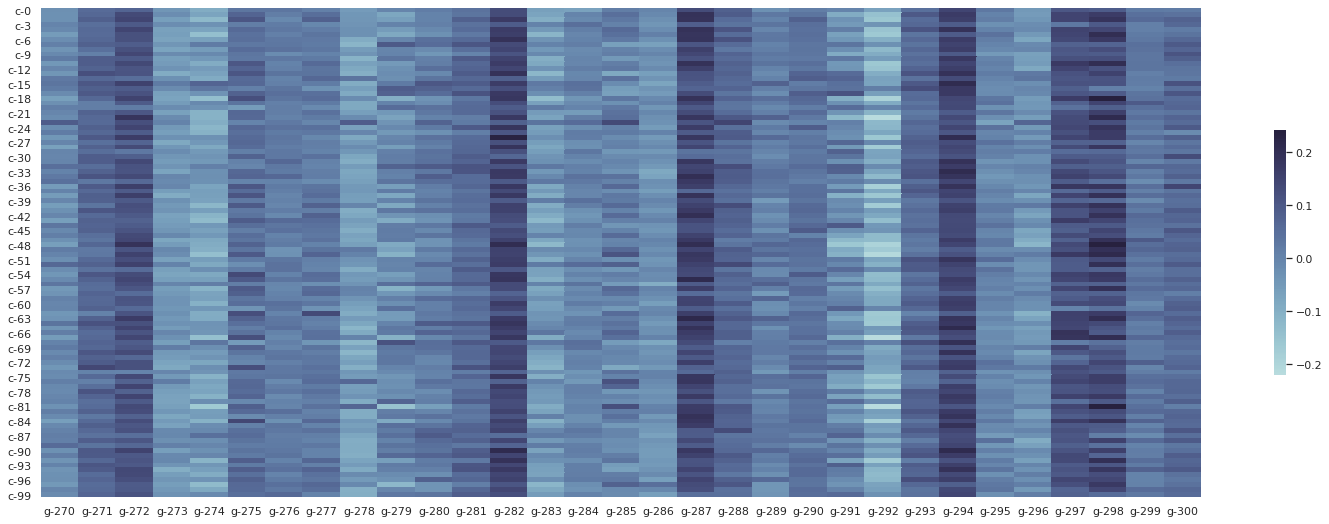

In [43]:
for a in range(10):
  corr_to_plot = corr_com_controle.loc[f'c-0':f'c-99',f'g-{0+30*a}':f'g-{30+30*a}']
  # Set up the matplotlib figure
  f, ax = plt.subplots(figsize=(26, 9))

  # Generate a custom diverging colormap
  cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)

  # Draw the heatmap with the mask and correct aspect ratio
  sns.heatmap(corr_to_plot, cmap=cmap, center=0,
              square=False, linewidths=0, cbar_kws={"shrink": .5})
  plt.show()

Estudando o código que plota a matriz de correlação (heatmap)

o HeatMap plota um gráfico de calor, onde as cores indicam o valor que corresponde as colunas x e y.

O seguinte codigo foi utilizado em aula:

corr_celular = dados.loc[:,'g-0':'g-50'].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_celular, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_celular, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
Nesse codigo, fazemos a correlação entre as primeiras 51 entre as variáveis, e posteriormente plotamos o grafico. O diferencial é que, cria-se uma mascara para não repetir informação, visto que quando comparamos correlação, se temos os mesmos valores para coluna e linha, os dados se repetem ao espelho da diagonal principal, e todos os valores da diagonal principal são 1. Exemplo: correlação_entre('c-0' e 'c-1') é igual a correlação_entre('c-1' e 'c-0').

In [44]:
corr_celular = dados.loc[:,'g-0':'g-50'].corr()

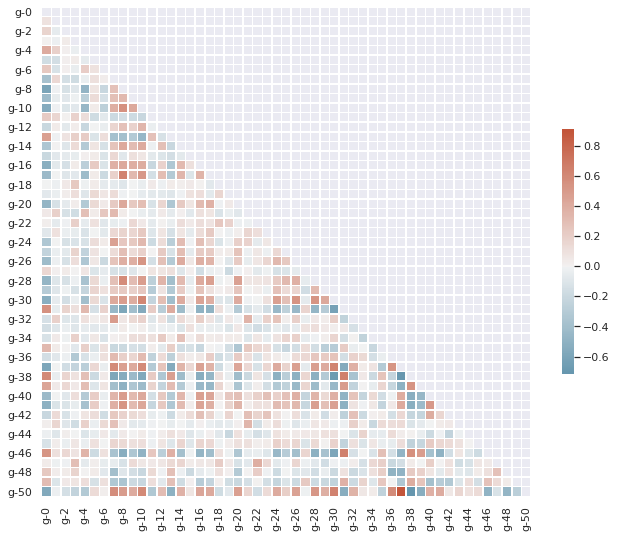

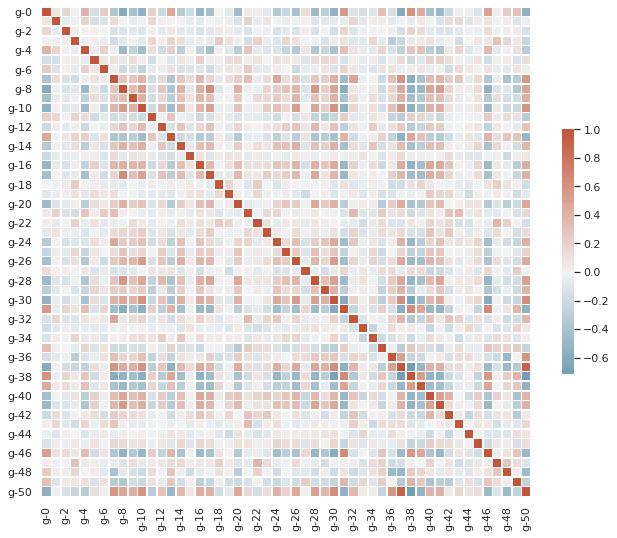

In [45]:
#Plot com mascara

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_celular, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_celular, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

#Plot sem mascara
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_celular, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

Aparentemente, um gene g, mantem uma corelação similar para todos os tipos celulares c. Por exemplo, o g-113 tem uma correlação alta com todos os c (do 0 ao 99). Esse comportamento se repete para praticamente todos os genes.

# Merge de Resultados + Aplicando Machine Learning:

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dados = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true', compression='zip')
dados.rename(columns={'droga': 'composto'}, inplace=True)


dados_resultados = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true')
display(dados_resultados)

id  ...  wnt_inhibitor
0      id_000644bb2  ...              0
1      id_000779bfc  ...              0
2      id_000a6266a  ...              0
3      id_0015fd391  ...              0
4      id_001626bd3  ...              0
...             ...  ...            ...
23809  id_fffb1ceed  ...              0
23810  id_fffb70c0c  ...              0
23811  id_fffc1c3f4  ...              0
23812  id_fffcb9e7c  ...              0
23813  id_ffffdd77b  ...              0

[23814 rows x 207 columns]

esta é a base de dados que complementa a primeira, são os mecanismos de ação das drogas, interações bioquímicas com o alvo(patógeno etc.). A primeira vista, a tabela parece ter apenas valores 0.

Vamos verificar isso, usando uma das colunas 

In [47]:
dados_resultados['acetylcholine_receptor_agonist'].unique()

array([0, 1])

Esses valores representam a ativação ou não do mecanismo de ação. Quando um determinado mecanismo de ação é ativado ele é indicado como 1. Quando esse mecanismo de ação não é ativado ele é 0.

Para saber qual mecanismo de ação foi mais ativado, podemos somar as colunas para saber qual apresenta mais o valor 1

### Exemplo de mecanismo de ação: o SARS-COV2 "atraca" seus spike no receptor da célula, e deposita seu material genético.. um dos remédios sendo estudados, usam receptores de membranas produzidos por bactérias usando genes humanos que sintetizam esses receptores de membranas, assim as proteínas recombinantes se ligam aos spikes do vírus, impedindo-o assim, de infectar as nossas células...



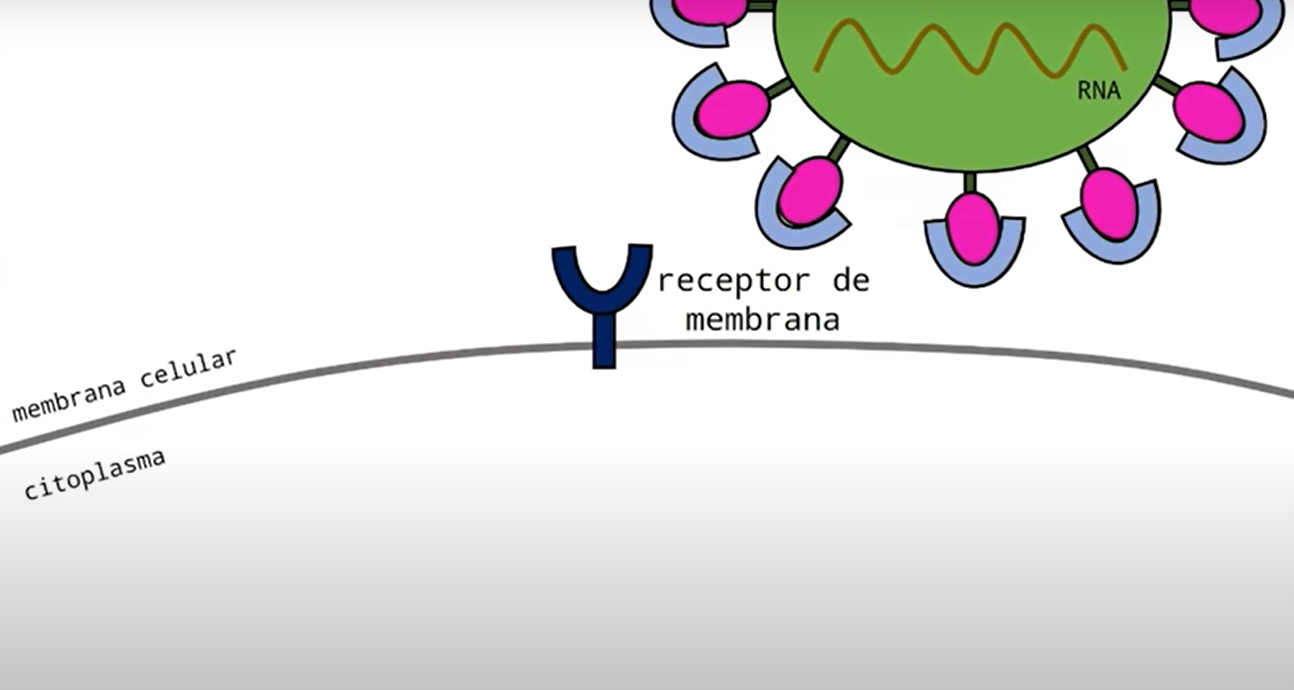

## A Técnica de DNA recombinante é muito usada, por exemplo, antigamente quem possuía diabetes tinha que fazer uso de insulina extraída do porco, ou seja não era insulina humana, hoje é possível fazer outros organismos produzirem insulina humana através do DNA recombinante

In [48]:
dados_resultados["acat_inhibitor"].unique()

array([0, 1])

#Qual o mecanismo de ação foi mais ativado?
### Para isso fazemos uma contagem desses MoA's, fazendo uma soma dos resultados bit = 1

In [49]:
contagem_moa = dados_resultados.select_dtypes("int64").sum().sort_values(ascending = False)
display(contagem_moa)

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
protein_phosphatase_inhibitor                   6
autotaxin_inhibitor                             6
diuretic                                        6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

### O mecanismo de ação mais ativado pelos compostos foi o inibidor nfkb: O fator de transcrição nuclear NF-κB é um importante complexo das reações inflamatórias das células e está envolvido em vários tipos de crescimentos cancerosos. O segundo colocado foram os Inibidores de proteassoma, que são drogas que bloqueiam a ação dos proteassomas, complexos celulares que decompõem as proteínas. Eles estão sendo estudados no tratamento do câncer; e três são aprovados para uso no tratamento de mieloma múltiplo.

imagem de proteassoma:

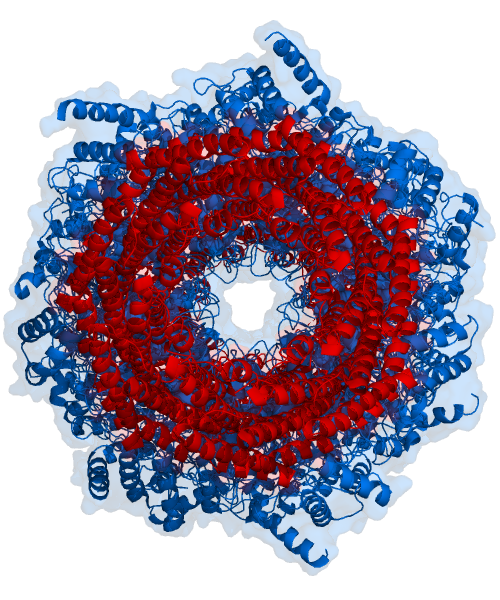

### A Seguir faremos um top 10 dos mecanismos de ações e suas respectivas explicações:

In [50]:
dados_moa = dados_resultados.drop('id', axis=1).sum().sort_values(ascending=False).reset_index()
dados_moa.columns = ['MoA', 'qtd']
dados_moa

MoA  qtd
0                                nfkb_inhibitor  832
1                          proteasome_inhibitor  726
2                      cyclooxygenase_inhibitor  435
3                  dopamine_receptor_antagonist  424
4                 serotonin_receptor_antagonist  404
..                                          ...  ...
201               protein_phosphatase_inhibitor    6
202                         autotaxin_inhibitor    6
203                                    diuretic    6
204                             erbb2_inhibitor    1
205  atp-sensitive_potassium_channel_antagonist    1

[206 rows x 2 columns]

In [51]:
acoes = []

moa_split = dados_moa['MoA'].str.split('_')
for row in moa_split:
  acoes.append(row[-1])

dados_moa['acao'] = acoes
dados_moa.head()

MoA  qtd        acao
0                 nfkb_inhibitor  832   inhibitor
1           proteasome_inhibitor  726   inhibitor
2       cyclooxygenase_inhibitor  435   inhibitor
3   dopamine_receptor_antagonist  424  antagonist
4  serotonin_receptor_antagonist  404  antagonist

In [52]:
acoes_10 = dados_moa.groupby('acao').agg({'qtd': 'sum'}).sort_values('qtd', ascending=False)
acoes_10 = acoes_10.reset_index().head(11)
acoes_10

acao   qtd
0           inhibitor  9693
1          antagonist  3449
2             agonist  2330
3             blocker   323
4               agent   150
5           activator   115
6               local    80
7         antioxidant    73
8   anti-inflammatory    73
9   immunosuppressant    73
10             medium    56

### OS Top 10 mecanismos de ação obtidos nessa pesquisa são:




1.   Inibidores
2.   Antagonistas
3.   Agonistas
4.   Bloqueadores
5.   Agentes
6.   Ativadores
7.   Locais
8.   Antioxidante
9.   Imunosupressores
10.  Médios





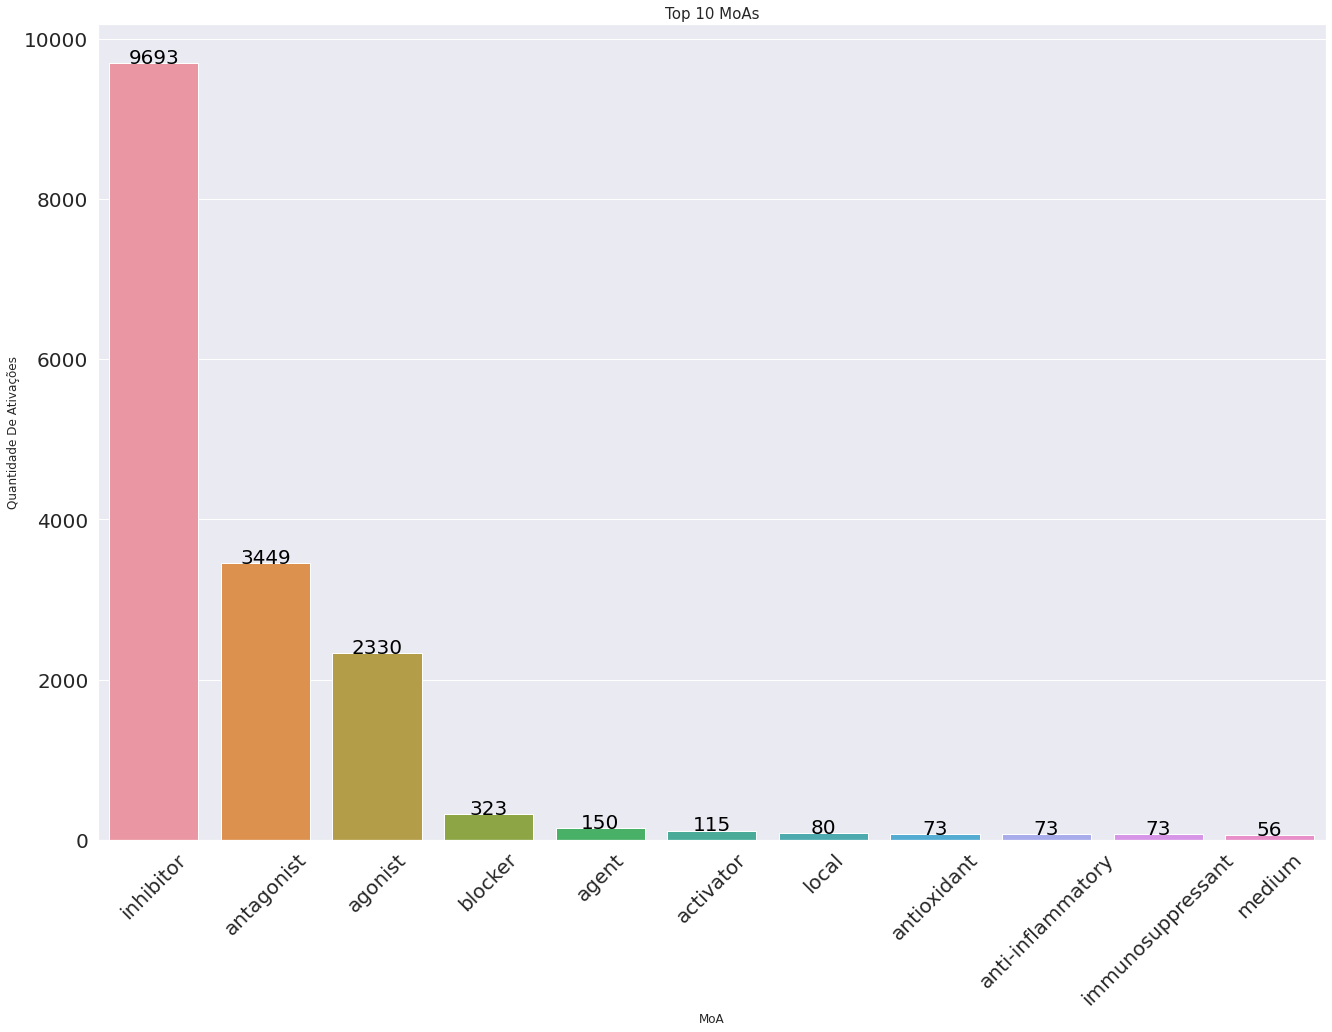

In [53]:
sns.set()
fig, ax = plt.subplots(figsize = (22, 15))

sns.set_palette(sns.color_palette("gist_heat", 10))

sns.barplot(data=acoes_10, x='acao', y='qtd', ax=ax)

ax.set_title('Top 10 MoAs', fontsize=15)
ax.set_xlabel('MoA', fontsize=12)
ax.set_ylabel('Quantidade De Ativações', fontsize=12)
plt.xticks(fontsize= 20, rotation=45)
plt.yticks(fontsize= 20)

for index, row in acoes_10.iterrows():
    ax.text(index, row['qtd'], row['qtd'], color='black', ha="center", fontsize= 20)

In [54]:
#Esta table mostra quantas vezes foram ativados mecanismos de ação linha por linha:
dados_resultados.drop("id", axis = 1).sum(axis = 1)

0        1
1        0
2        3
3        0
4        1
        ..
23809    1
23810    1
23811    0
23812    1
23813    0
Length: 23814, dtype: int64

In [55]:
dados.head()

id tratamento  tempo dose  ...    c-96    c-97    c-98    c-99
0  id_000644bb2  com_droga     24   D1  ... -0.3981  0.2139  0.3801  0.4176
1  id_000779bfc  com_droga     72   D1  ...  0.1522  0.1241  0.6077  0.7371
2  id_000a6266a  com_droga     48   D1  ... -0.6417 -0.2187 -1.4080  0.6931
3  id_0015fd391  com_droga     48   D1  ... -1.6210 -0.8784 -0.3876 -0.8154
4  id_001626bd3  com_droga     72   D2  ...  0.1094  0.2885 -0.3786  0.7125

[5 rows x 877 columns]

In [56]:
dados_resultados.head()

id  ...  wnt_inhibitor
0  id_000644bb2  ...              0
1  id_000779bfc  ...              0
2  id_000a6266a  ...              0
3  id_0015fd391  ...              0
4  id_001626bd3  ...              0

[5 rows x 207 columns]

## Agora faremos o 'merge' dessas duas bases de dados usando uma função do python. Que nada mais é, do que a mesclagem...

In [57]:
dados_resultados["n-moa"] = dados_resultados.drop("id", axis = 1).sum(axis = 1)

In [58]:
#primeiro criamos uma nova coluna com a soma das ativações, além de uma coluna dizendo se foi ativado ou não algum mecanismo de ação:
dados_resultados["ativo-moa"] = dados_resultados ["n-moa"] != 0
display(dados_resultados)

id  5-alpha_reductase_inhibitor  ...  n-moa  ativo-moa
0      id_000644bb2                            0  ...      1       True
1      id_000779bfc                            0  ...      0      False
2      id_000a6266a                            0  ...      3       True
3      id_0015fd391                            0  ...      0      False
4      id_001626bd3                            0  ...      1       True
...             ...                          ...  ...    ...        ...
23809  id_fffb1ceed                            0  ...      1       True
23810  id_fffb70c0c                            0  ...      1       True
23811  id_fffc1c3f4                            0  ...      0      False
23812  id_fffcb9e7c                            0  ...      1       True
23813  id_ffffdd77b                            0  ...      0      False

[23814 rows x 209 columns]

In [59]:
dados_combinados = pd.merge(dados, dados_resultados[["id", "n-moa", "ativo-moa"]], on = "id")
display(dados_combinados)

id    tratamento  tempo dose  ...    c-98    c-99  n-moa  ativo-moa
0      id_000644bb2     com_droga     24   D1  ...  0.3801  0.4176      1       True
1      id_000779bfc     com_droga     72   D1  ...  0.6077  0.7371      0      False
2      id_000a6266a     com_droga     48   D1  ... -1.4080  0.6931      3       True
3      id_0015fd391     com_droga     48   D1  ... -0.3876 -0.8154      0      False
4      id_001626bd3     com_droga     72   D2  ... -0.3786  0.7125      1       True
...             ...           ...    ...  ...  ...     ...     ...    ...        ...
23809  id_fffb1ceed     com_droga     24   D2  ...  0.5258  0.4680      1       True
23810  id_fffb70c0c     com_droga     24   D2  ... -0.2715  0.3689      1       True
23811  id_fffc1c3f4  com_controle     48   D2  ...  0.6656  0.3808      0      False
23812  id_fffcb9e7c     com_droga     24   D1  ... -0.6290  0.0740      1       True
23813  id_ffffdd77b     com_droga     72   D1  ... -2.1500 -4.2520      0      False

[23814 rows x 879 columns]

agora iremos apenas confirmar se um mecanismo de ação foi ativado ou não no grupo de controle:

In [60]:
dados_combinados.query("tratamento == 'com_controle'")["ativo-moa"].value_counts()

False    1866
Name: ativo-moa, dtype: int64

confirmado o grupo de controle está tudo em 0 os mecanismos de ação.

In [61]:
#agora criamos uma coluna que converte True para 1 e False para 0
dados_combinados['eh_controle'] = (dados_combinados['tratamento'] == 'com_controle').astype('int')
display(dados_combinados)

id    tratamento  tempo  ... n-moa ativo-moa  eh_controle
0      id_000644bb2     com_droga     24  ...     1      True            0
1      id_000779bfc     com_droga     72  ...     0     False            0
2      id_000a6266a     com_droga     48  ...     3      True            0
3      id_0015fd391     com_droga     48  ...     0     False            0
4      id_001626bd3     com_droga     72  ...     1      True            0
...             ...           ...    ...  ...   ...       ...          ...
23809  id_fffb1ceed     com_droga     24  ...     1      True            0
23810  id_fffb70c0c     com_droga     24  ...     1      True            0
23811  id_fffc1c3f4  com_controle     48  ...     0     False            1
23812  id_fffcb9e7c     com_droga     24  ...     1      True            0
23813  id_ffffdd77b     com_droga     72  ...     0     False            0

[23814 rows x 880 columns]

In [62]:
#agora criaremos três colunas para indicar o tempo 24, 48, 72
dados_combinados['24 Horas'] = (dados_combinados['tempo'] == 24).astype('int')
dados_combinados['48 Horas'] = (dados_combinados['tempo'] == 48).astype('int')
dados_combinados['72 Horas'] = (dados_combinados['tempo'] == 72).astype('int')
display(dados_combinados)

id    tratamento  tempo  ... 24 Horas 48 Horas  72 Horas
0      id_000644bb2     com_droga     24  ...        1        0         0
1      id_000779bfc     com_droga     72  ...        0        0         1
2      id_000a6266a     com_droga     48  ...        0        1         0
3      id_0015fd391     com_droga     48  ...        0        1         0
4      id_001626bd3     com_droga     72  ...        0        0         1
...             ...           ...    ...  ...      ...      ...       ...
23809  id_fffb1ceed     com_droga     24  ...        1        0         0
23810  id_fffb70c0c     com_droga     24  ...        1        0         0
23811  id_fffc1c3f4  com_controle     48  ...        0        1         0
23812  id_fffcb9e7c     com_droga     24  ...        1        0         0
23813  id_ffffdd77b     com_droga     72  ...        0        0         1

[23814 rows x 883 columns]

para saber mais sobre combinações de DF https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
Além da documentação, um site com um excelente conteúdo sobre combinações é https://realpython.com/pandas-merge-join-and-concat/


(para ver as modificações no dataframe role até as últimas colunas)

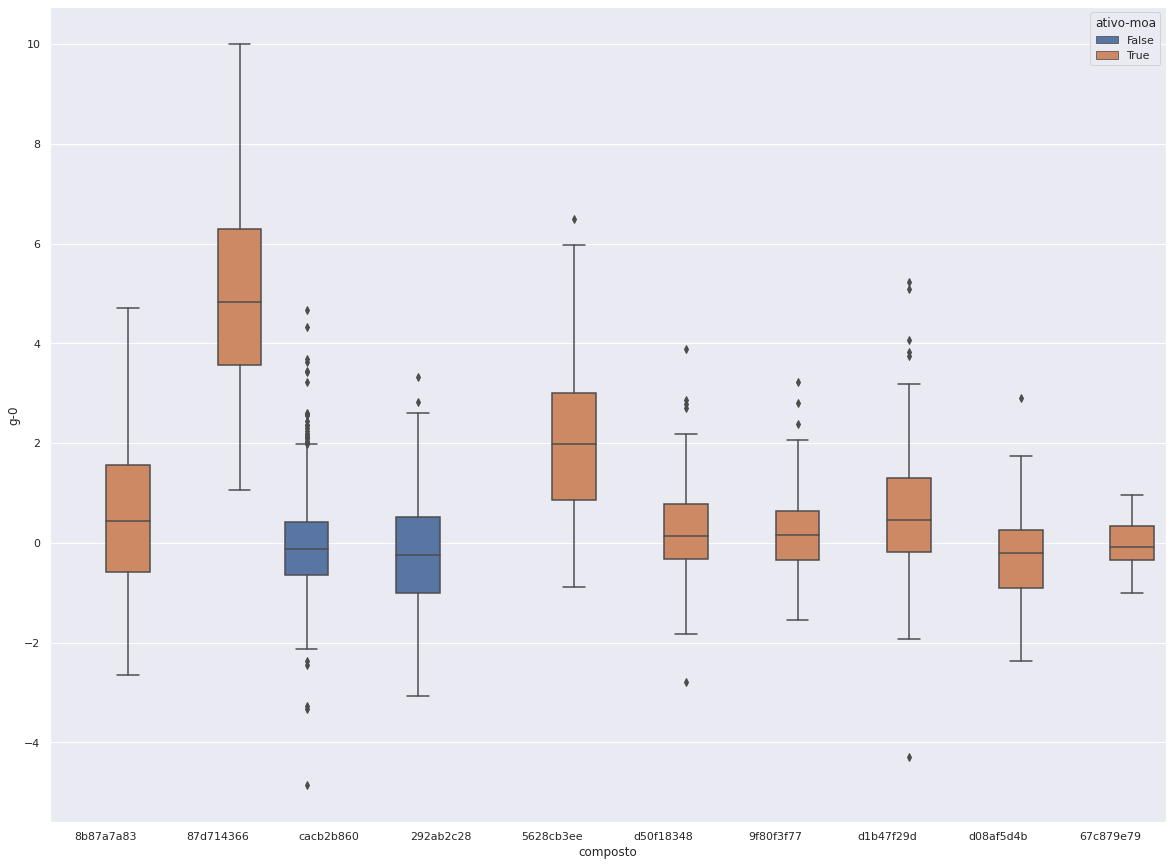

In [67]:
plt.figure(figsize = (20, 15))
compostos_principais = dados_combinados["composto"].value_counts().index[:10]
sns.set()
sns.boxplot(data = dados_combinados.query("composto in @compostos_principais"), y = "g-0", x = "composto", hue = "ativo-moa")

no boxplot acima podemos ver a ação dos top10 compostos, no gene g-0... spoiler: o composto "cacb2b860" é o composto de controle!

##Agora faremos uma análise mais detalhada considerando tempo e dose, para comparar as distribuições (Escolhendo uma droga e comparando com controle):

In [71]:
cod_compostos = compostos_principais
display(cod_compostos)

Index(['cacb2b860', '87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee',
       'd08af5d4b', '292ab2c28', 'd50f18348', 'd1b47f29d', '67c879e79'],
      dtype='object')

usando a expressão gênica g-49:

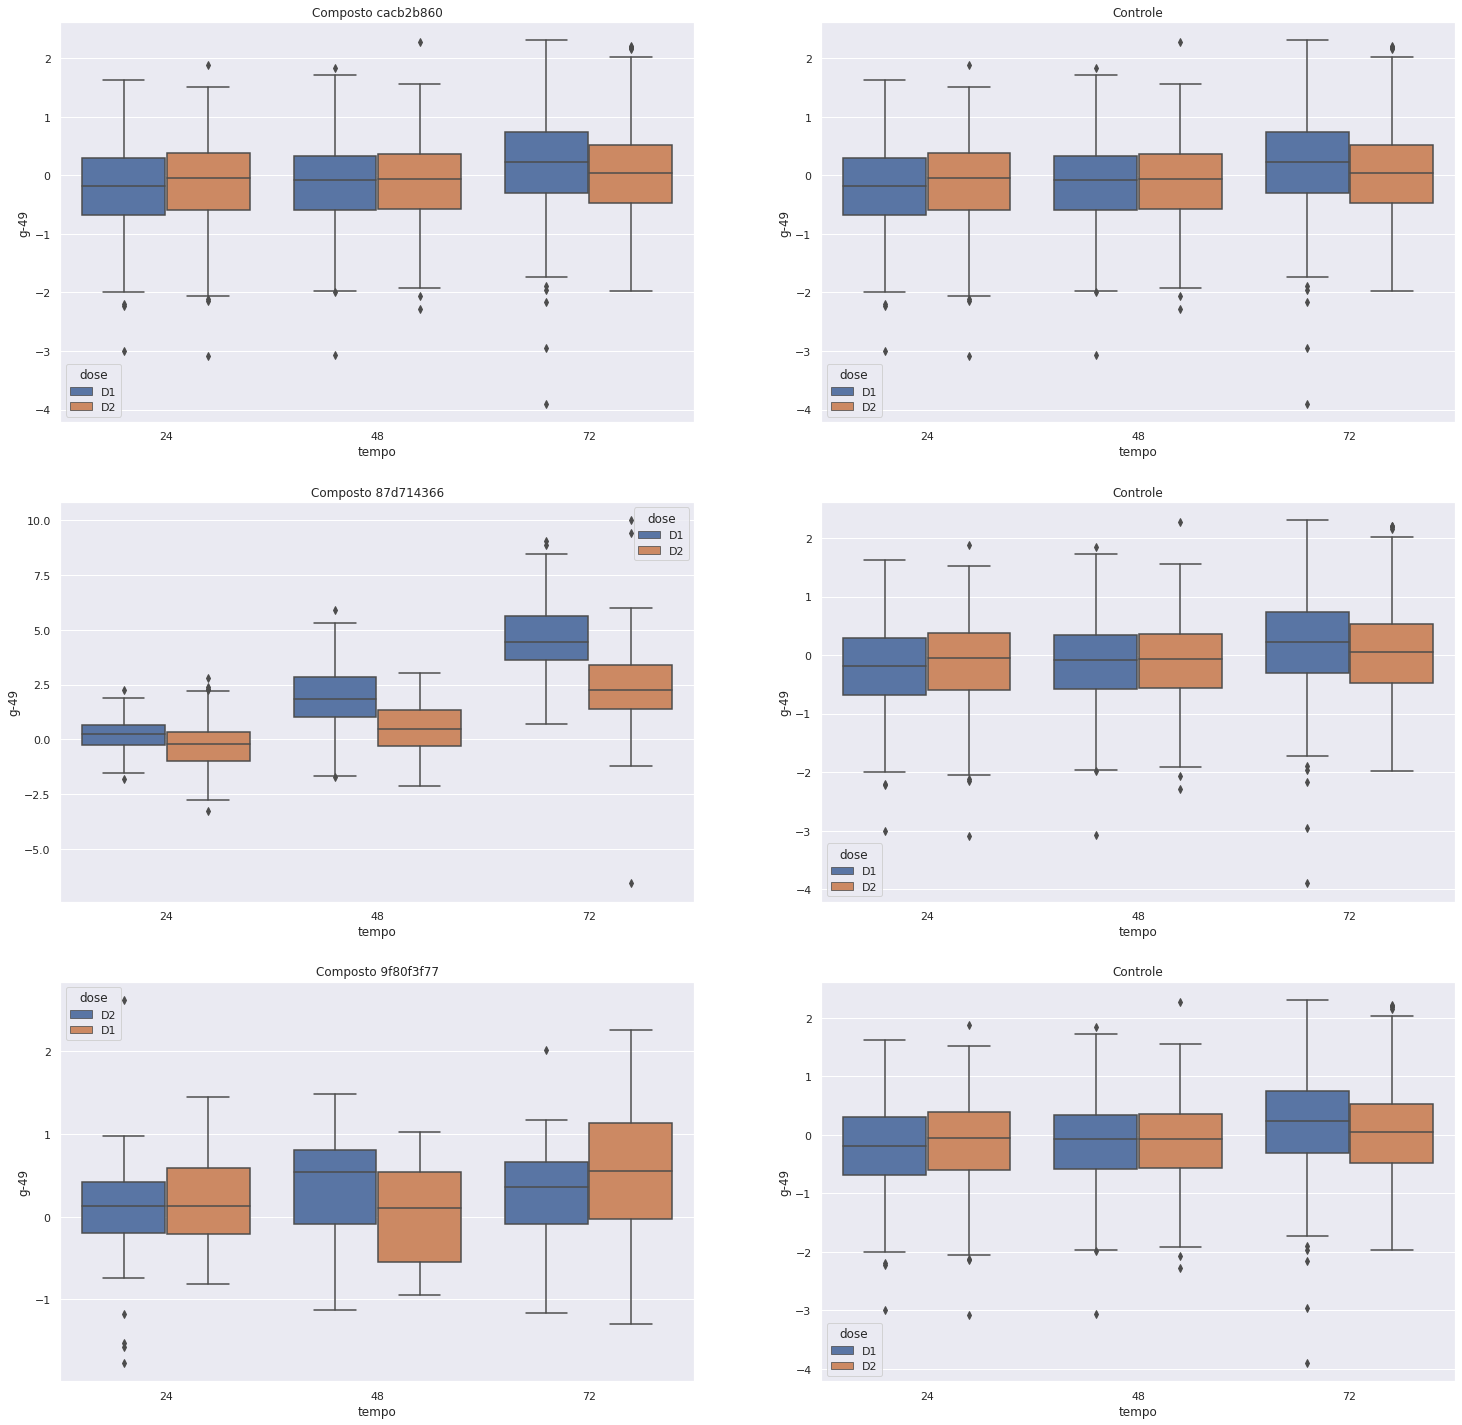

In [72]:
fig, axs = plt.subplots(3, 2, figsize=(25 , 25))
sns.set()

controle = dados_combinados[dados_combinados['tratamento'] == 'com_controle']

composto = dados_combinados[dados_combinados['composto'] == cod_compostos[0]]
sns.boxplot(data = composto, y='g-49', x='tempo', hue='dose', ax = axs[0, 0])
axs[0, 0].set_title(f'Composto {cod_compostos[0]}')

sns.boxplot(data = controle, y='g-49', x='tempo', hue='dose', ax = axs[0, 1])
axs[0, 1].set_title('Controle')

composto = dados_combinados[dados_combinados['composto'] == cod_compostos[1]]
sns.boxplot(data = composto, y='g-49', x = 'tempo', hue = 'dose', ax = axs[1, 0])
axs[1, 0].set_title(f'Composto {cod_compostos[1]}')

sns.boxplot(data = controle, y = 'g-49', x = 'tempo', hue = 'dose', ax = axs[1, 1])
axs[1, 1].set_title('Controle')

composto = dados_combinados[dados_combinados['composto']==cod_compostos[2]]

sns.boxplot(data = composto, y = 'g-49', x = 'tempo', hue = 'dose', ax = axs[2, 0])
axs[2,0].set_title(f'Composto {cod_compostos[2]}')

sns.boxplot(data = controle, y = 'g-49', x ='tempo', hue = 'dose', ax = axs[2,1])
axs[2,1].set_title('Controle')
plt.show()

através do boxplot acima podemos ver que dois compostos agem da seguinte maneira: um faz aumentar a expressão gênica em 72horas, e outro faz a expressão gênica diminuir consideravelmente em 48 horas. (Nesse gene)

Agora vamos descobrir se tem algum composto que dependendo da configuração do experimento, ativa ou não ativa algum MOA:

In [73]:
compostos_principais =  dados_combinados['composto'].value_counts().head(10).index
compostos_principais

Index(['cacb2b860', '87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee',
       'd08af5d4b', '292ab2c28', 'd50f18348', 'd1b47f29d', '67c879e79'],
      dtype='object')

In [74]:
top10 = dados_combinados.query('composto in @compostos_principais')
top10

id    tratamento  tempo  ... 24 Horas 48 Horas  72 Horas
7      id_0020d0484     com_droga     48  ...        0        1         0
16     id_002fb9c19     com_droga     48  ...        0        1         0
25     id_0054388ec  com_controle     48  ...        0        1         0
38     id_0079af0fb  com_controle     24  ...        1        0         0
39     id_0079d45d3     com_droga     24  ...        1        0         0
...             ...           ...    ...  ...      ...      ...       ...
23793  id_ffd26f361  com_controle     48  ...        0        1         0
23802  id_fff3976bd     com_droga     24  ...        1        0         0
23805  id_fff6df1c5     com_droga     48  ...        0        1         0
23811  id_fffc1c3f4  com_controle     48  ...        0        1         0
23812  id_fffcb9e7c     com_droga     24  ...        1        0         0

[4008 rows x 883 columns]

In [75]:
dados_combinados['composto'].value_counts().head(10)

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
d08af5d4b     196
292ab2c28     194
d50f18348     186
d1b47f29d     178
67c879e79      19
Name: composto, dtype: int64

In [76]:
df = pd.crosstab([top10['dose'], top10['tempo'], top10['ativo-moa']],  top10['composto'], values = dados_combinados['g-0'], aggfunc = 'count')
df.fillna(0)

composto              292ab2c28  5628cb3ee  ...  d1b47f29d  d50f18348
dose tempo ativo-moa                        ...                      
D1   24    False           32.0        0.0  ...        0.0        0.0
           True             0.0       31.0  ...       28.0       28.0
     48    False           34.0        0.0  ...        0.0        0.0
           True             0.0       36.0  ...       31.0       35.0
     72    False           32.0        0.0  ...        0.0        0.0
           True             0.0       35.0  ...       28.0       31.0
D2   24    False           32.0        0.0  ...        0.0        0.0
           True             0.0       31.0  ...       29.0       30.0
     48    False           32.0        0.0  ...        0.0        0.0
           True             0.0       35.0  ...       31.0       31.0
     72    False           32.0        0.0  ...        0.0        0.0
           True             0.0       34.0  ...       31.0       31.0

[12 rows x 10 columns]

## temos da esquerda para a direita: o composto 1 não ativa mecanismos de ação em 100% dos testes, já o segundo composto ativa em 100% dos testes, e assim por diante, agora vamos descobrir se tem algum composto que dependendo da configuração do experimento, ativa MOAs diferentes:

In [81]:
dados_combinados[['composto' , 'n-moa']][dados_combinados['n-moa'] > 1].value_counts(ascending=False).head(11)

composto   n-moa
87d714366  2        718
d50f18348  3        186
83a9ea167  2         18
fe8625cad  4         12
b30c11496  3         12
ae0c59f9b  2         12
24a3fbf37  2         12
f2cd513d6  2         12
42446ee76  2         11
eacb563b3  2          7
5735a3e0f  2          7
dtype: int64

vemos que o composto 87d714366 ativa mecanismos de ações diferentes em 718 casos...

## Desenvolvimento do Modelo Machine Learning:


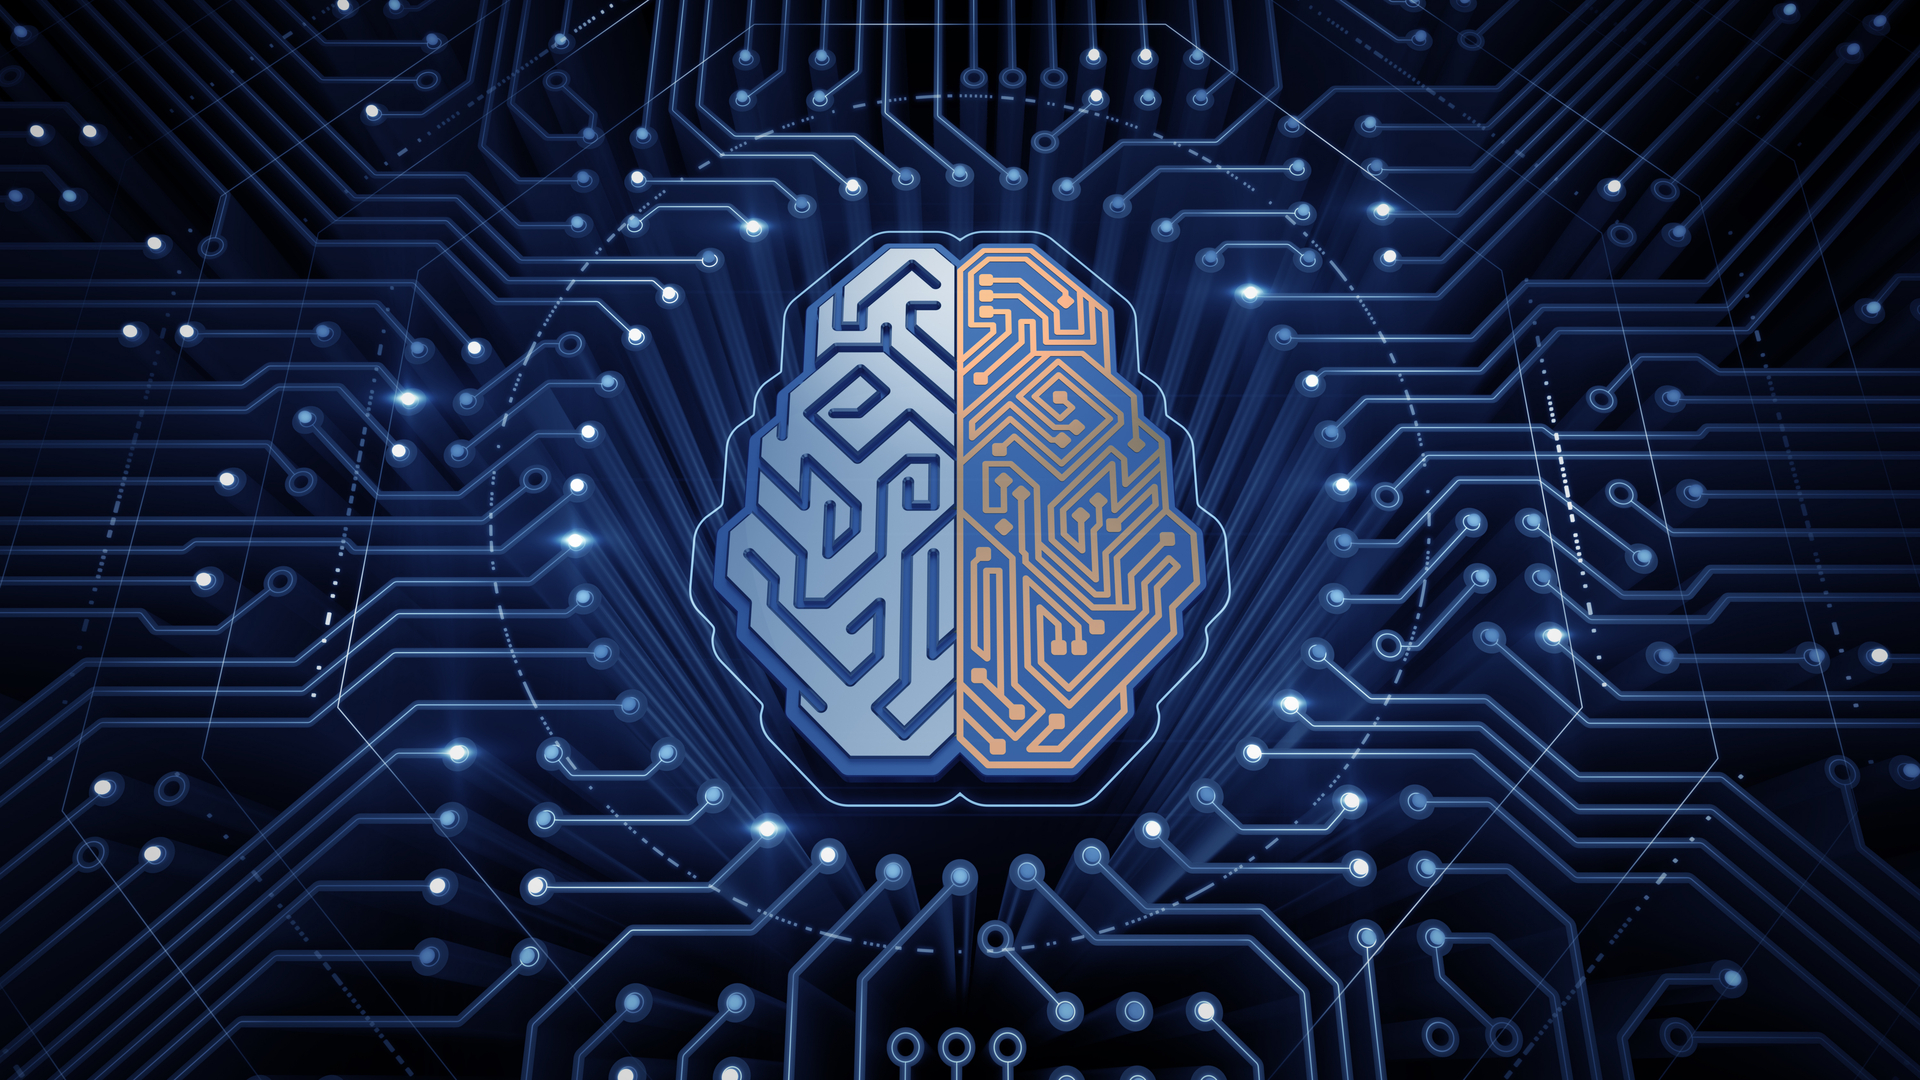

In [82]:
dados_combinados.head(11)

id tratamento  tempo  ... 24 Horas 48 Horas  72 Horas
0   id_000644bb2  com_droga     24  ...        1        0         0
1   id_000779bfc  com_droga     72  ...        0        0         1
2   id_000a6266a  com_droga     48  ...        0        1         0
3   id_0015fd391  com_droga     48  ...        0        1         0
4   id_001626bd3  com_droga     72  ...        0        0         1
5   id_001762a82  com_droga     24  ...        1        0         0
6   id_001bd861f  com_droga     24  ...        1        0         0
7   id_0020d0484  com_droga     48  ...        0        1         0
8   id_00224bf20  com_droga     48  ...        0        1         0
9   id_0023f063e  com_droga     48  ...        0        1         0
10  id_002452c7e  com_droga     72  ...        0        0         1

[11 rows x 883 columns]

## podemos fazer um experimento com o modelo de classificação binária para  saber se qualquer mecanismo de ação foi ativado ou não ativado.E se dado os experimentos, queremos saber se um determinado mecanismo de ação foi ativado, recebendo como resposta, o composto relacionado.Além de retornar respostas interessantes:

In [85]:
dados_resultados.head(11)

id  5-alpha_reductase_inhibitor  ...  n-moa  ativo-moa
0   id_000644bb2                            0  ...      1       True
1   id_000779bfc                            0  ...      0      False
2   id_000a6266a                            0  ...      3       True
3   id_0015fd391                            0  ...      0      False
4   id_001626bd3                            0  ...      1       True
5   id_001762a82                            0  ...      1       True
6   id_001bd861f                            0  ...      0      False
7   id_0020d0484                            0  ...      1       True
8   id_00224bf20                            0  ...      0      False
9   id_0023f063e                            0  ...      1       True
10  id_002452c7e                            0  ...      1       True

[11 rows x 209 columns]

## Queremos não somente ter como retorno se um mecanismo de ação foi ativado mas qual ou quais são estes mecanismos.Primeiramente vamos ver se, dado os experimentos, podemos saber se QUALQUER mecanismo de ação foi ativado ou não.

In [93]:
#parametrização dos dados de treino da I.A.
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2)

### As etapas lógicas do nosso processo é:

Dado um composto -> temos a nossa assinatura celular (```g e c```) -> analisamos o(s) mecanismo(s) de ação ativados (MoA) 

Mas, a nossa pergunta a ser respondida é, "Dado um composto e uma assinatura celular, houve algum MoA ativado?" Então, as etapas lógicas passam a ser:

Composto -> assinatura celular -> MoA ativado?

E como nosso modelo vai aprender a partir da nosa base de dados?

Composto 1 -> Assinatura A -> MoA = 1
Composto 2 -> Assinatura B -> MoA = 0
Composto 3 -> Assinatura C -> MoA = 1
...
Composto N -> Assinatura N -> MoA = 0

Ou seja, toda a nossa base de dados dados_combinados será a fonte de aprendizado do nosso modelo. Onde, cada experimento (linha) representa um exemplo (assinatura) já que temos a reunião de todas as informações necessárias para criar a nossa classificação binária e, terá como variável resposta, também chamada de target, a coluna ativo_moa, uma variável binária (0, 1).

E, por fim, o nosso modelo deverá ser capaz de resolver o seguinte problema:

Composto candidato -> Assinatura X -> MoA = 1 OU MoA = 0?

Existem diversas técnicas de ML que são capazes de solucionar o nosso problema mas aqui, vamos usar a Regressão Logística e, essa técnica já está implementada em uma biblioteca bastante usada e bem importante para ML no Python, o Scikit-Learn.

Sugerimos que você leia essa documentação e se familiarize com esta biblioteca, ela será muito importante na sua trajetória como Cientista de Dados. E, clicando em "Classification" na página inicial, encontramos, no primeiro capítulo, chamado "Linear Models", o nosso subtítulo de interesse: "1.1.11 Logistic Regression".

Quando implementamos um modelo de classificação, precisamos separar a nossa base de dados em base de treino e base de teste. A base de treino, vai ser onde o nosso modelo vai aprender e, a base de teste serve para a verificação do aprendizado do modelo, ou seja, poderemos entender se, de fato, as previsões do nosso modelo estão de acordo com o esperado.

Não podemos treinar e testar o modelo com o mesmo conjunto de dados porque, seria muito mais fácil dele prever corretamente. A base de dados de teste, funciona como um novo conjunto onde poderemos medir o quanto o nosso modelo está acertando, dado que já temos a variável resposta real.

Para fazer esta divisão, usamos uma função do Scikit-Learn chamada train_teste_split (como já aprendemos, para usar uma biblioteca ou função, precisamos, primeiramente, fazer a importação padrão e, neste caso, usaremos from sklearn.model_selection import train_test_split).

Para fazer a divisão da base de dados, é necessário definir qual será o nosso x e o nosso y. Um modelo matemático, define um y em função de um x, ou seja, f(x) = y. Neste projeto, o nosso y será o target, ativo_moa e, ele será definido a partir de uma assinatura (conjunto composto por g + c ou , expressão gênica + viabilidade celular).

Assim, teremos:

x = dados_combinados.select_dtypes('float64')  ->  toda a base de dados que tem os valores com o formato, ```float64```, no nosso caso, todas as variáveis ```g``` e ```c```

y = dados_combinados['ativo_moa']  ->  apenas a coluna target, ou seja, ```ativo_moa```

Para o train_test_split definiremos:

x_treino, x_teste, y_treino, y_teste

E a função receberá como parâmetro:

train_test_split(x, y, test_size = 0.2)

Onde,

x -> base de dados definida como x, no nosso caso, todas as variáveis ```g``` e ```c```

y -> variável resposta, no nosso caso, ```ativo_moa```

teste_size = 0.2 -> tamanho que definimos para a base de teste

A proporção entre treino e teste, varia de acordo com o volume de dados que temos. Mas, usualmente, encontramos proporções 30/70, 25/75 ou 20/80. Aqui, definimos como 0,2 ou 20%, isso significa que a base de treino será composta pelos 80% restante.

###Agora, podemos fazer a nossa primeira regressão logística.

O primeiro passo, é definir o nosso x, y e o x_treino, x_teste, y_treino, y_teste do train_test_split.

Após isso, definimos um nome para o nosso modelo (modelo_rlogistica) e declaramos a função LogisticRegression(). Acrescentamos um parâmetro max_iter = 1000 no modelo para que ele seja capaz de convergir para um resultado e assim, não recebemos nenhum warning no resultado.

Em seguida, ajustamos o modelo com o .fit(x_treino, y_treino) (lembrando que os argumentos desta função são x e y e, usamos x_treino e y_treino porque será através dessas bases que o algoritmo aprenderá).

E, por fim, usamos a função .score(x_teste, y_teste) para verificar como o nosso modelo ajustado está se saindo nos dados de teste. O score()calcula a acurácia, ou seja, quantas predições o nosso modelo acertou na base de teste.

Como resultado, temos o valor da acurácia: ~0,627. Então, concluímos que o nosso modelo está acertando ~62% das previsões (caso tivéssemos 100 experimentos, o modelo acertaria 62 casos e erraria 38 casos).

Mas, como podemos estabelecer se este é um bom valor que possui precisão ou não?

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo-moa'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

modelo_rlogistica = LogisticRegression(max_iter=1000)
modelo_rlogistica.fit(x_treino, y_treino)
modelo_rlogistica.score(x_teste, y_teste)

0.6267058576527399

Para estabelecer se temos um bom valor de acurácia, precisamos de uma base comparativa, quer dizer, preciso dos resultados de um outro modelo para entender se estamos acertando mais ou menos casos.

Para isso, o Scikit-Learn, já tem implementado alguns algoritmos que fazer modelos menos complexos e que podem ser usados como base comparativa. Neste caso, vamos usar o DummyClassifier.

O processo para ajustar este modelo é muito parecido com aquele que usamos para a regressão logística: dividimos a base em treino e teste, definimos um nome para esse modelo e o instanciamos, o ajustamos com os dados de treino e, ao final, verificamos a acurácia com o conjunto teste.

Ao instanciarmos o DummyClassifier, precisamos definir a estratégia que ele usará para fazer o ajuste do modelo. No nosso caso, definimos a estratégia será os dados mais frequentes, isso quer dizer que: dado o valor mais frequente da nossa variável resposta (ativo_moa), o modelo Dummy vai chutar que todos os eventos da base de dados assumem aquele valor no target. Assim, temos: DummyClassifier('most_frequent').

Nesse momento, para calcular a acurácia, vamos usar outra estratégia, a função accuracy_score também do Scikit-Learn. Ela receberá como parâmetros a base teste da variável resposta (y_teste) e as previsões do modelo que, até o momento ainda não calculamos. Para calcular as previsões, usamos o .predict() da mesma biblioteca que, receberá como parâmetro a base x_teste. Por fim, o cálculo da acurácia será:

previsao_dummy = modelo_dummy.predict(x_teste)
accuracy_score(y_teste, previsao_dummy)

A acurácia do DummyClassifierfoi de ~60,7%, isso significa que nosso modelo LogisticRegression teve um desempenho um pouco melhor.


In [96]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)
accuracy_score(y_teste, previsao_dummy)

0.6067604450976275

Podemos entender a acurácia do DummyClassifier se fizermos um value_counts normalizado e então verificamos que a proporção entre a classe 0 e a classe 1 é 60/30, ou seja, o valor mais frequente (estratégia usada no DummyClassifier) representa 60% da base de dados. Isso quer dizer que, caso o modelo chutasse a mesma classe para todos os eventos da base de teste, teríamos um acerto de 60% dos casos.

In [98]:
dados_combinados['ativo-moa'].value_counts(normalize=True)

True     0.60666
False    0.39334
Name: ativo-moa, dtype: float64

Entretanto, toda vez que rodamos tanto a nossa regressão logística, quanto o nosso dummy classifier, recebemos como retorno um valor diferente de acurácia, apesar de em muitos casos, serem próximos.

O train_test_split a base de dados em subconjuntos aleatórios de treino e teste. Isso significa que toda vez que você executá-lo, você obterá um resultado diferente.

Por outro lado, se você declarar o parâmetro random_state = n, poderá garantir que a saída de todas as execuções será igual, ou seja, sua divisão será sempre a mesma. Não importa qual número você escolherá para o random_state, o importante é que toda vez que você usá-lo, sempre terá a mesma saída.

Além do random_state, existe mais um parâmetro bem importante que deve ser levado em consideração na divisão da nossa base de dados, o stratify.

Se repararmos na divisão da variável ativo_moa, entre true e false, percebemos que segue um balanceamento 60/40. E, é do nosso interesse que as bases de treino e teste sigam, além de uma divisão reprodutível (garantida com random_state), a proporção original do conjunto de dados. Assim, atribuimos stratify = coluna, onde coluna = nome da coluna que o stratify deve levar em consideração a proporção de classes. No nosso caso, usamos stratify = y, pois y é a nossa variável resposta e, é dela que o stratify deve considerar a proporção: 60/40.

Esses parâmetros são úteis, porque garantimos que os resultados são reproduzíveis e compatíveis, independente do modelo (qual técnica, por exemplo, regressão logística, dummy classifier, árvore de decisão e etc) que vamos treinar e testar a partir desta divisão.

Ou seja, ao final, nosso train_teste_split ficará:

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)
Nesse momento, temos interesse a explorar outras técnicas de modelagem para comparar os resultados obtidos e ver qual o melhor algoritmo que conseguimos produzir.

Sendo assim, vamos testar uma nova técnica: a árvore de decisão.

Novamente, a sequência lógica para ajustar esse novo modelo é muito parecida com que estávamos vendo até o momento: definimos as bases x e y, fazemos o train_test_split, declaramos o novo modelo, ajustamos e verificamos a acurácia.

Aqui, vamos usar o DecisionTreeClassifier, também da biblioteca Scikit-Learn. O único parâmetro que vamos declarar para esta função será o max_depth = 3 mas, vamos explorar seu significado a seguir.

Como resultado, temos uma acurácia (calculada a partir da base de teste) de ~0,61% e, é um pouco menos do que a acurácia obtida com a regressão logística.

In [100]:
from sklearn.tree import DecisionTreeClassifier


x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo-moa'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

modelo_arvore = DecisionTreeClassifier(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
modelo_arvore.score(x_teste, y_teste)

0.6105395758975436

Agora, vamos entender melhor como funciona uma árvore de decisão e o que significa o parâmetro max_depth = 3. Plotamos uma imagem que representa o nosso modelo e, nesse momento, é importante que você não se apegue ao código que usamos para isso. O que realmente é relevante é entender o algoritmo!

A figura é dividida em 4 níveis e, o primeiro nível (estamos considerando a orientação de cima para baixo), é composto por apenas um quadro que é chamado de nó raíz ou somente raíz e ele tem como regras, os melhores atributos que podem dividir a nossa base de dados em dois conjuntos distintos (lembrando que nosso objetivo é separar a nossa base de dados em mecanismo de ação ativado ou não ativado).

Entre o primeiro e o segundo nível (e nos demais níveis), temos duas setas: uma para a direita e outra para a esquerda. Essas setas são chamadas de ramos e subdividem o nível acima em dois outros conjuntos que separam novamente os dados em mecanismo de ação ativado ou não ativado, a partir de uma decisão.

O último nível da árvore (mais abaixo), apresenta n quadros que apresentam características que devem ser levadas em conta na hora da classificação e se dividem em class = ativado e class = não ativado. Esse nível não apresenta mais ramificações e, esses quadros são chamados de folhas.

Se reparmos, a nossa árvore tem 3 níveis de decisão a partir da raíz e é exatamente isso que o parâmetro max_depthrepresenta: a profundidade da árvore.

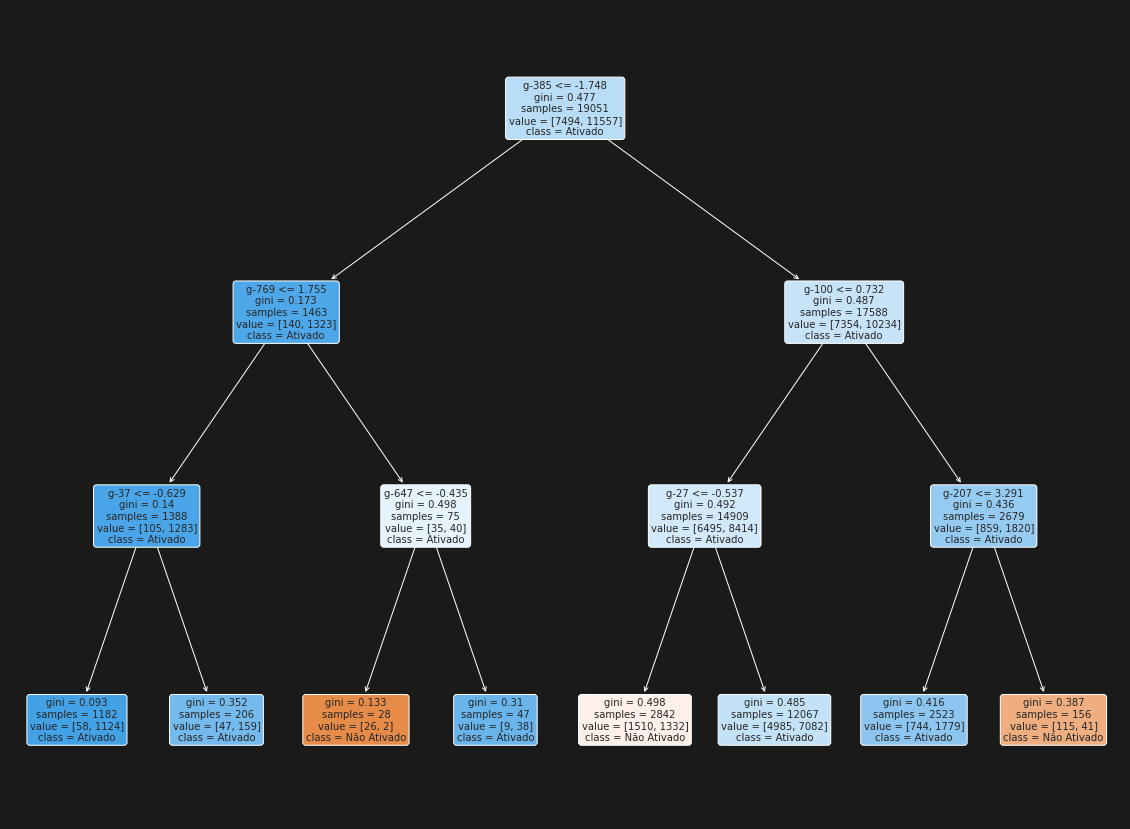

In [103]:
from sklearn import tree

fig, ax = plt.subplots(figsize=(20, 15), facecolor='k')
tree.plot_tree(modelo_arvore,
               ax=ax,
               fontsize=10,
               rounded=True,
               filled=True,
               feature_names=x_treino.columns,
               class_names=['Não Ativado', 'Ativado'])

plt.show()

Como vimos, o desempenho do nosso novo modelo com apenas 3 camadas de decisão não foi tão satisfatório assim. Por isso, vamos variar o max_depth dentro de um intervalo de valores (range) e comparar os resultados obtidos.

O processo para obter os valores que queremos, é sempre o mesmo. Por isso, vamos criar um loop ou um laço de repetição (um loop, executa um bloco de código em repetição enquanto uma condição é atendida).

Então, após fazermos a separação da base de dados em x e y e dividí-las no train_test_split, vamos criar um for para que nosso modelo seja treinado e testado em repetição dentro de um range. Para isso, faremos:

In [105]:
from sklearn.tree import DecisionTreeClassifier


x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo-moa'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

teste=[]
treino=[]
for i in range(1,15):
    modelo_arvore = DecisionTreeClassifier(max_depth = i)
    modelo_arvore.fit(x_treino, y_treino)
    teste.append(modelo_arvore.score(x_teste, y_teste))
    treino.append(modelo_arvore.score(x_treino, y_treino))

In [106]:
teste

[0.6067604450976275,
 0.6067604450976275,
 0.6105395758975436,
 0.6199874028973336,
 0.6206172580306529,
 0.6183077892084821,
 0.6212471131639723,
 0.6212471131639723,
 0.6159983203863112,
 0.612639093008608,
 0.6109594793197565,
 0.5981524249422633,
 0.597102666386731,
 0.5981524249422633]

In [107]:
treino

[0.6066348223190384,
 0.6066348223190384,
 0.6211222508004829,
 0.6360820954280615,
 0.6412261823526324,
 0.6489423127394888,
 0.6605427536612252,
 0.6707259461445594,
 0.6896225919899218,
 0.7068395359823632,
 0.7292530575822791,
 0.753188808986405,
 0.7771770510734345,
 0.7991706472101202]

vamos plotar um gráfico para entender o comportamento combinado dessas listas.

Usaremos o lineplot do Seaborn para construir essa visualização. Como parâmetros, teremos:

x = range(1, 15)   ->  intervalo que usamos no for
y = teste e y = treino  ->  listas criamos no for e será usada no eixo y do gráfico
label = 'teste' e label = 'teste'  ->  etiqueta para identificar as duas linhas que estarão no gráfico 

Observando o gráfico produzido, podemos perceber que, inicialmente, os valores de treino e teste são muito próximos mas, conforme vamos aumentando o range, o valor da acurácia para os dados de treino aumentam muito enquanto, esse mesmo valor para os dados de teste, vai caindo (as linhas vão se afastando).

Isso significa que, conforme aumentamos a profundidade da nossa árvore de decisão, a classificação para os dados de treino ficam muito boas pois, ela consegue captar muito bem as características desses dados. Mas, em contrapartida, o modelo fica tão bom os dados de treino que, quando apresentamos um novo conjunto de dados (teste), ele não consegue generalizar tão bem e assim, temos uma acurácia em queda.

Esse problema de um modelo com performance muito boa nos dados de treino mas performance em queda nos dados de teste, é muito conhecido na ciência de dados e chamamos de overfitting.

Então, conseguimos perceber que, para melhorar o nosso modelo, não é suficiente somente aumentar a profundidade da árvore de decisão e assim, precisamos traçar uma outra etratégia para melhorar a performance do nosso modelo.

Nesse momento, vamos testar uma nova técnica de modelagem: o Random Forest. O que este modelo faz é criar várias árvores de decisões na qual ele considera amostras aleatórias do nosso conjunto total.

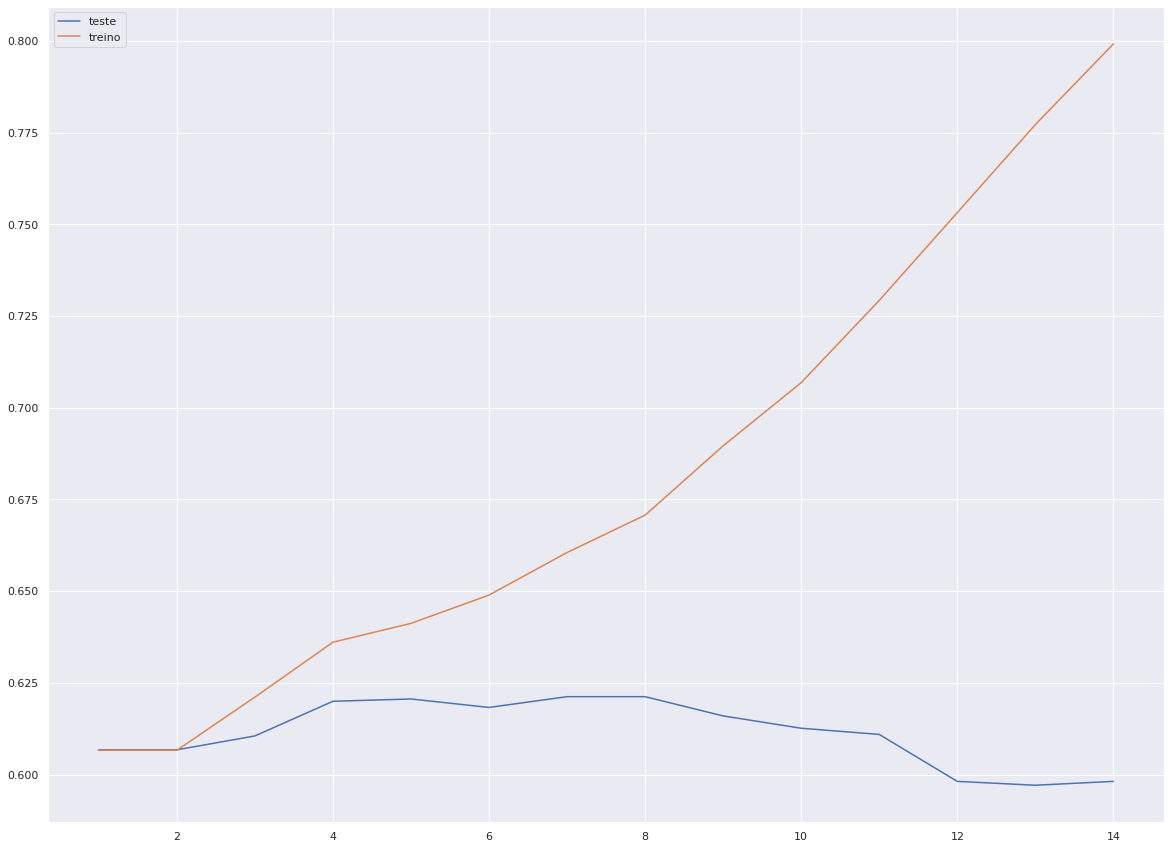

In [109]:
plt.figure(figsize = (20, 15))
sns.lineplot(x=range(1,15), y = teste, label='teste')
sns.lineplot(x=range(1,15), y = treino, label='treino')

A função que treina um modelo de Random Forest (RandomForestClassifier()) não aceita que tenhamos variáveis em formato de string. Por isso, precisamos tratar as variáveis que são strings e transformá-las em números (ou no formato float64).

Para fazer essa transformação, vamos usar uma função do Pandas, chamada get_dummies e nela, declaramos a coluna que queremos que seja transformada. Por exemplo, aqui, usamos:

pd.get_dummies(dados_combinados['tratamento'])

Isso porque, nossa intenção é transformar a coluna tratamento da base dados_combinados em dados numéricos.

Para fazer a transformação desejada, o get_dummies pega todas as categorias de uma variável e as transforma em novas colunas binárias. Por exemplo:

A variável tratamento apresenta duas categorias com_controle e sem_controle. Quando aplicamos o get_dummies, ele cria duas novas colunas binárias e análogas as categorias. Se temos um evento que apresentava na coluna original a marcação com_droga, agora ela apresentará valor 0 na coluna com_controle e valor 1 na coluna com_droga e vice-versa.

In [110]:
pd.get_dummies(dados_combinados['tratamento'])

com_controle  com_droga
0                 0          1
1                 0          1
2                 0          1
3                 0          1
4                 0          1
...             ...        ...
23809             0          1
23810             0          1
23811             1          0
23812             0          1
23813             0          1

[23814 rows x 2 columns]

Agora que entendemos como o get_dummies funciona, podemos transformar todas as nossas variáveis de interesse: tratamento, dose e tempo.

Para isso, declaramos a base de dados completa e, no parâmetro columns, listamos as variáveis que devem ser transformadas. Assim teremos:

pd.get_dummies(dados_combinados, columns=['tratamento', 'dose', 'tempo'])

In [111]:
pd.get_dummies(dados_combinados, columns=['tratamento', 'dose', 'tempo'])

id   composto     g-0  ...  tempo_24  tempo_48  tempo_72
0      id_000644bb2  b68db1d53  1.0620  ...         1         0         0
1      id_000779bfc  df89a8e5a  0.0743  ...         0         0         1
2      id_000a6266a  18bb41b2c  0.6280  ...         0         1         0
3      id_0015fd391  8c7f86626 -0.5138  ...         0         1         0
4      id_001626bd3  7cbed3131 -0.3254  ...         0         0         1
...             ...        ...     ...  ...       ...       ...       ...
23809  id_fffb1ceed  df1d0a5a1  0.1394  ...         1         0         0
23810  id_fffb70c0c  ecf3b6b74 -1.3260  ...         1         0         0
23811  id_fffc1c3f4  cacb2b860  0.3942  ...         0         1         0
23812  id_fffcb9e7c  8b87a7a83  0.6660  ...         1         0         0
23813  id_ffffdd77b  972f41291 -0.8598  ...         0         0         1

[23814 rows x 887 columns]

Aqui, estamos estabelecendo qual será a base de dados usada para modelar o novo algoritmo. Agora, não mais consideraremos apenas os dados genéticos, também levaremos em conta as demais variáveis, exceto as seguintes variáveis:

'id'  ->  não será relevante nesse momento pois é somente um número de identificação
'n_moa'  ->  não será relevante nesse momento pois é a quantidade de MoAs ativados
'ativo_moa'  ->  retiramos da base pois é a nossa variável resposta
'composto'  ->  não será relevante nesse momento pois identifica o composto usado e foge do que estamos buscando fazer

Para retirar essas variáveis da nossa base de dados, usamos a função drop, declaramos as variáveis a serem retiradas em forma de uma lista e identificamos que são colunas através do parâmetro axis = 1.

In [113]:
dados_combinados.drop(['id', 'n-moa', 'ativo-moa', 'composto'], axis=1)

tratamento  tempo dose  ...  24 Horas  48 Horas  72 Horas
0         com_droga     24   D1  ...         1         0         0
1         com_droga     72   D1  ...         0         0         1
2         com_droga     48   D1  ...         0         1         0
3         com_droga     48   D1  ...         0         1         0
4         com_droga     72   D2  ...         0         0         1
...             ...    ...  ...  ...       ...       ...       ...
23809     com_droga     24   D2  ...         1         0         0
23810     com_droga     24   D2  ...         1         0         0
23811  com_controle     48   D2  ...         0         1         0
23812     com_droga     24   D1  ...         1         0         0
23813     com_droga     72   D1  ...         0         0         1

[23814 rows x 879 columns]

Enfim, podemos partir para o ajuste do nosso modelo de Random Forest.

Novamente, vamos seguir as mesmas etapas lógicas anteriores. Entretando, precisamos modificar o a nossa base x. Então faremos:

x = dados_combinados.drop(['id', 'n_moa', 'ativo_moa', 'composto'], axis=1)  ->  base de dados de deve ser considerada com a exclusão das colunas que determinamos anteriormente
x = pd.get_dummies(x, columns=['tratamento', 'dose', 'tempo'])  ->  a partir do x definido acima, fazemos a transformação com o get_dummies nas colunas com o formato de string

Por fim, temos como retorno uma acurácia de ~68,0% e, ela é, aproximadamente, 7% melhor que a acurácia que conseguimos com o DummyClassifier. Aqui, não podemos comparar com a regressão logística porque estamos considerando um outro conjunto de dados.

É muito importante ressaltar que, apesar de termos melhorado a acurácia do nosso modelo, pensando na vida real, talvez a nossa melhora ainda não seja suficiente. Ou seja, desenvolvemos um modelo com um algoritmo de Machine Learning mas, ele ainda não é aplicável à vida real (isso quer dizer que, ainda não nos traz ganhos suficientes para sua implantação).

Por outro lado, durante todo o nosso projeto, desenvolvemos modelos simples e não nos aprofundamos em todos os pontos que podem ser modificados (variáveis, parâmetros de modelos, por exemplo) a fim de otimizar a nossa generalização. Deixamos em destaque também a sua trajetória até aqui, certamente ela deve ser seu foco (e é também o nosso)! O resultado é apenas uma consequência disso tudo e sabemos que, para melhorá-lo você precisa persistir no estudo dessa área.

A Imersão de Dados 3 foi o seu primeiro passo na ciência de dados e aqui, deixamos o convite para que você continue estudando, explorando e aprendendo todos os processos e áreas desse mundo gigantesco de possibilidades!

In [115]:
from sklearn.ensemble import RandomForestClassifier


x = dados_combinados.drop(['id', 'n-moa', 'ativo-moa', 'composto'], axis=1)
x = pd.get_dummies(x, columns=['tratamento', 'dose', 'tempo'])
y = dados_combinados['ativo-moa'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

modelo_randomforest = RandomForestClassifier()
modelo_randomforest.fit(x_treino, y_treino)
modelo_randomforest.score(x_teste, y_teste)

0.6785639302960319

In [117]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

x = dados_combinados.drop(['id', 'n-moa', 'ativo-moa', 'composto'], axis=1)
x = pd.get_dummies(x, columns=['tratamento', 'dose', 'tempo'])
y = dados_combinados['ativo-moa'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

sgd_classifier = make_pipeline(StandardScaler(),SGDClassifier(max_iter=500))
sgd_classifier.fit(x_treino, y_treino)


sgd_classifier.score(x_teste, y_teste)

0.635733781230317

In [119]:
from sklearn.kernel_approximation import RBFSampler

x = dados_combinados.drop(['id', 'n-moa', 'ativo-moa', 'composto'], axis=1)
x = pd.get_dummies(x, columns=['tratamento', 'dose', 'tempo'])
y = dados_combinados['ativo-moa'] 

rbf_feature = RBFSampler(gamma=1, random_state=1)
x = rbf_feature.fit_transform(x)
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

clf = SGDClassifier(max_iter=5)
clf.fit(x_treino, y_treino)

clf.score(x_teste, y_teste)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


0.6034012177199244

https://scikit-learn.org/stable/


 https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [125]:
dados_combinados['n-moa_cat'] = dados_combinados['n-moa'].apply(lambda x: 2 if x>=2 else 1 if x == 1 else 0)

In [127]:
x = dados_combinados.drop(['id', 'n-moa', 'ativo-moa', 'composto', 'n-moa_cat'], axis=1)
x = pd.get_dummies(x, columns=['tratamento', 'dose', 'tempo'])
y = dados_combinados['n-moa_cat'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

sgd_classifier = make_pipeline(StandardScaler(),SGDClassifier(max_iter=500))
sgd_classifier.fit(x_treino, y_treino)


sgd_classifier.score(x_teste, y_teste)

0.5941633424312408

In [128]:
modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)
accuracy_score(y_teste, previsao_dummy)

0.5263489397438589

In [129]:
x = dados_combinados.drop(['id', 'n-moa', 'ativo-moa', 'composto', 'n-moa_cat'], axis=1)
x = pd.get_dummies(x, columns=['tratamento', 'dose', 'tempo'])
y = dados_combinados['composto'].apply(lambda x: 1 if x == 'cacb2b860' else 0)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

sgd_classifier = make_pipeline(StandardScaler(),SGDClassifier(max_iter=500))
sgd_classifier.fit(x_treino, y_treino)
print('y_teste:\n', y_teste.value_counts())
unique, counts = np.unique(sgd_classifier.predict(x_teste), return_counts=True)
print('y_teste 0:', counts[0])
print('y_teste 1:', counts[1])
sgd_classifier.score(x_teste, y_teste)

y_teste:
 0    4390
1     373
Name: composto, dtype: int64
y_teste 0: 4419
y_teste 1: 344


0.993911400377913

In [131]:
x = dados_combinados.drop(['id', 'n-moa', 'ativo-moa', 'composto', 'n-moa_cat'], axis=1)
x = pd.get_dummies(x, columns=['tratamento', 'dose', 'tempo'])
y = dados_combinados['composto'].apply(lambda x: 1 if x == '87d714366' else 0)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

sgd_classifier = make_pipeline(StandardScaler(),SGDClassifier(max_iter=500))
sgd_classifier.fit(x_treino, y_treino)
print('y_teste:\n', y_teste.value_counts())
unique, counts = np.unique(sgd_classifier.predict(x_teste), return_counts=True)
print('y_teste 0:', counts[0])
print('y_teste 1:', counts[1])
sgd_classifier.score(x_teste, y_teste)

y_teste:
 0    4619
1     144
Name: composto, dtype: int64
y_teste 0: 4623
y_teste 1: 140


0.9987402897333614

id  5-alpha_reductase_inhibitor  ...  n-moa  ativo-moa
0      id_000644bb2                            0  ...      1       True
1      id_000779bfc                            0  ...      0      False
2      id_000a6266a                            0  ...      3       True
3      id_0015fd391                            0  ...      0      False
4      id_001626bd3                            0  ...      1       True
...             ...                          ...  ...    ...        ...
23809  id_fffb1ceed                            0  ...      1       True
23810  id_fffb70c0c                            0  ...      1       True
23811  id_fffc1c3f4                            0  ...      0      False
23812  id_fffcb9e7c                            0  ...      1       True
23813  id_ffffdd77b                            0  ...      0      False

[23814 rows x 209 columns]

In [134]:
dados_combinados['composto'].value_counts().head(10)

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
d08af5d4b     196
292ab2c28     194
d50f18348     186
d1b47f29d     178
67c879e79      19
Name: composto, dtype: int64

# Agora Veremos a precisão do nosso modelo nos top 10:

In [135]:
x = dados_combinados.drop(['id', 'n-moa', 'ativo-moa', 'composto', 'n-moa_cat'], axis=1)
x = pd.get_dummies(x, columns=['tratamento', 'dose', 'tempo'])
y = dados_combinados['composto'].apply(lambda x: 1 if x == 'cacb2b860' else 0)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

sgd_classifier = make_pipeline(StandardScaler(),SGDClassifier(max_iter=500))
sgd_classifier.fit(x_treino, y_treino)
print('y_teste:\n', y_teste.value_counts())
unique, counts = np.unique(sgd_classifier.predict(x_teste), return_counts=True)
print('y_teste 0:', counts[0])
print('y_teste 1:', counts[1])
sgd_classifier.score(x_teste, y_teste)

y_teste:
 0    4390
1     373
Name: composto, dtype: int64
y_teste 0: 4420
y_teste 1: 343


0.9937014486668067

99%

In [136]:
x = dados_combinados.drop(['id', 'n-moa', 'ativo-moa', 'composto', 'n-moa_cat'], axis=1)
x = pd.get_dummies(x, columns=['tratamento', 'dose', 'tempo'])
y = dados_combinados['composto'].apply(lambda x: 1 if x == '87d714366' else 0)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

sgd_classifier = make_pipeline(StandardScaler(),SGDClassifier(max_iter=500))
sgd_classifier.fit(x_treino, y_treino)
print('y_teste:\n', y_teste.value_counts())
unique, counts = np.unique(sgd_classifier.predict(x_teste), return_counts=True)
print('y_teste 0:', counts[0])
print('y_teste 1:', counts[1])
sgd_classifier.score(x_teste, y_teste)

y_teste:
 0    4619
1     144
Name: composto, dtype: int64
y_teste 0: 4621
y_teste 1: 142


0.9987402897333614

99%

In [137]:
x = dados_combinados.drop(['id', 'n-moa', 'ativo-moa', 'composto', 'n-moa_cat'], axis=1)
x = pd.get_dummies(x, columns=['tratamento', 'dose', 'tempo'])
y = dados_combinados['composto'].apply(lambda x: 1 if x == '9f80f3f77' else 0)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

sgd_classifier = make_pipeline(StandardScaler(),SGDClassifier(max_iter=500))
sgd_classifier.fit(x_treino, y_treino)
print('y_teste:\n', y_teste.value_counts())
unique, counts = np.unique(sgd_classifier.predict(x_teste), return_counts=True)
print('y_teste 0:', counts[0])
print('y_teste 1:', counts[1])
sgd_classifier.score(x_teste, y_teste)

y_teste:
 0    4714
1      49
Name: composto, dtype: int64
y_teste 0: 4729
y_teste 1: 34


0.9934914969557002

99%

In [138]:
x = dados_combinados.drop(['id', 'n-moa', 'ativo-moa', 'composto', 'n-moa_cat'], axis=1)
x = pd.get_dummies(x, columns=['tratamento', 'dose', 'tempo'])
y = dados_combinados['composto'].apply(lambda x: 1 if x == '8b87a7a83' else 0)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

sgd_classifier = make_pipeline(StandardScaler(),SGDClassifier(max_iter=500))
sgd_classifier.fit(x_treino, y_treino)
print('y_teste:\n', y_teste.value_counts())
unique, counts = np.unique(sgd_classifier.predict(x_teste), return_counts=True)
print('y_teste 0:', counts[0])
print('y_teste 1:', counts[1])
sgd_classifier.score(x_teste, y_teste)

y_teste:
 0    4722
1      41
Name: composto, dtype: int64
y_teste 0: 4726
y_teste 1: 37


0.9987402897333614

99%

In [139]:
x = dados_combinados.drop(['id', 'n-moa', 'ativo-moa', 'composto', 'n-moa_cat'], axis=1)
x = pd.get_dummies(x, columns=['tratamento', 'dose', 'tempo'])
y = dados_combinados['composto'].apply(lambda x: 1 if x == '5628cb3ee' else 0)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

sgd_classifier = make_pipeline(StandardScaler(),SGDClassifier(max_iter=500))
sgd_classifier.fit(x_treino, y_treino)
print('y_teste:\n', y_teste.value_counts())
unique, counts = np.unique(sgd_classifier.predict(x_teste), return_counts=True)
print('y_teste 0:', counts[0])
print('y_teste 1:', counts[1])
sgd_classifier.score(x_teste, y_teste)

y_teste:
 0    4723
1      40
Name: composto, dtype: int64
y_teste 0: 4737
y_teste 1: 26


0.996220869200084

99%

In [140]:
x = dados_combinados.drop(['id', 'n-moa', 'ativo-moa', 'composto', 'n-moa_cat'], axis=1)
x = pd.get_dummies(x, columns=['tratamento', 'dose', 'tempo'])
y = dados_combinados['composto'].apply(lambda x: 1 if x == 'd08af5d4b' else 0)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

sgd_classifier = make_pipeline(StandardScaler(),SGDClassifier(max_iter=500))
sgd_classifier.fit(x_treino, y_treino)
print('y_teste:\n', y_teste.value_counts())
unique, counts = np.unique(sgd_classifier.predict(x_teste), return_counts=True)
print('y_teste 0:', counts[0])
print('y_teste 1:', counts[1])
sgd_classifier.score(x_teste, y_teste)

y_teste:
 0    4724
1      39
Name: composto, dtype: int64
y_teste 0: 4731
y_teste 1: 32


0.9951711106445518

99%

In [141]:
x = dados_combinados.drop(['id', 'n-moa', 'ativo-moa', 'composto', 'n-moa_cat'], axis=1)
x = pd.get_dummies(x, columns=['tratamento', 'dose', 'tempo'])
y = dados_combinados['composto'].apply(lambda x: 1 if x == '292ab2c28' else 0)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

sgd_classifier = make_pipeline(StandardScaler(),SGDClassifier(max_iter=500))
sgd_classifier.fit(x_treino, y_treino)
print('y_teste:\n', y_teste.value_counts())
unique, counts = np.unique(sgd_classifier.predict(x_teste), return_counts=True)
print('y_teste 0:', counts[0])
print('y_teste 1:', counts[1])
sgd_classifier.score(x_teste, y_teste)

y_teste:
 0    4724
1      39
Name: composto, dtype: int64
y_teste 0: 4730
y_teste 1: 33


0.9966407726222969

99%

In [142]:
x = dados_combinados.drop(['id', 'n-moa', 'ativo-moa', 'composto', 'n-moa_cat'], axis=1)
x = pd.get_dummies(x, columns=['tratamento', 'dose', 'tempo'])
y = dados_combinados['composto'].apply(lambda x: 1 if x == 'd50f18348' else 0)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

sgd_classifier = make_pipeline(StandardScaler(),SGDClassifier(max_iter=500))
sgd_classifier.fit(x_treino, y_treino)
print('y_teste:\n', y_teste.value_counts())
unique, counts = np.unique(sgd_classifier.predict(x_teste), return_counts=True)
print('y_teste 0:', counts[0])
print('y_teste 1:', counts[1])
sgd_classifier.score(x_teste, y_teste)

y_teste:
 0    4726
1      37
Name: composto, dtype: int64
y_teste 0: 4742
y_teste 1: 21


0.9958009657778711

99%

In [143]:
x = dados_combinados.drop(['id', 'n-moa', 'ativo-moa', 'composto', 'n-moa_cat'], axis=1)
x = pd.get_dummies(x, columns=['tratamento', 'dose', 'tempo'])
y = dados_combinados['composto'].apply(lambda x: 1 if x == 'd1b47f29d' else 0)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

sgd_classifier = make_pipeline(StandardScaler(),SGDClassifier(max_iter=500))
sgd_classifier.fit(x_treino, y_treino)
print('y_teste:\n', y_teste.value_counts())
unique, counts = np.unique(sgd_classifier.predict(x_teste), return_counts=True)
print('y_teste 0:', counts[0])
print('y_teste 1:', counts[1])
sgd_classifier.score(x_teste, y_teste)

y_teste:
 0    4727
1      36
Name: composto, dtype: int64
y_teste 0: 4733
y_teste 1: 30


0.9983203863111484

também 99%

In [145]:
dados_combinados

id    tratamento  tempo  ... 48 Horas 72 Horas  n-moa_cat
0      id_000644bb2     com_droga     24  ...        0        0          1
1      id_000779bfc     com_droga     72  ...        0        1          0
2      id_000a6266a     com_droga     48  ...        1        0          2
3      id_0015fd391     com_droga     48  ...        1        0          0
4      id_001626bd3     com_droga     72  ...        0        1          1
...             ...           ...    ...  ...      ...      ...        ...
23809  id_fffb1ceed     com_droga     24  ...        0        0          1
23810  id_fffb70c0c     com_droga     24  ...        0        0          1
23811  id_fffc1c3f4  com_controle     48  ...        1        0          0
23812  id_fffcb9e7c     com_droga     24  ...        0        0          1
23813  id_ffffdd77b     com_droga     72  ...        0        1          0

[23814 rows x 884 columns]

# Foi Alcançado um modelo de ML de predição capaz de prever com 99% de precisão todo o comportamento minunciosamente de cada composto em cada gene, célula etc de todos os 20 milhões de dados não tratados, além de ser capaz de prever possíveis efeitos colaterais e ativações gênicas não-desejadas...como os compostos ainda estão em desenvolvimento são anônimos, assim como as células, que são mantidas pelo Broad Institute, portanto não temos nomes de compostos nem nomes de células, senão poderíamos usar a base de dados para uma exploração ainda mais ampla.